In [335]:
using DataFrames, PyPlot, ScikitLearn, LowRankModels, Convex, ECOS, CSV
include("proxgrad.jl")
using ScikitLearn.CrossValidation: cross_val_score

In [487]:
kFoldArray = ScikitLearn.CrossValidation.KFold(2269, n_folds = 5)
#kFoldArray[1]
#kFoldArray[2]

5-element Array{Tuple{Array{Int64,1},Array{Int64,1}},1}:
 ([455, 456, 457, 458, 459, 460, 461, 462, 463, 464  …  2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  445, 446, 447, 448, 449, 450, 451, 452, 453, 454])                    
 ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269], [455, 456, 457, 458, 459, 460, 461, 462, 463, 464  …  899, 900, 901, 902, 903, 904, 905, 906, 907, 908])                    
 ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269], [909, 910, 911, 912, 913, 914, 915, 916, 917, 918  …  1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362])          
 ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269], [1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372  …  1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816])
 ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1807, 1808, 18

In [508]:
rawBronxData = readtable("2015Bronx.txt", separator = '\t')

,Health_Service_Area,Hospital_County,Operating_Certificate_Number,Facility_ID,Facility_Name,Age_Group,Zip_Code_3_digits,Gender,Race,Ethnicity,Length_of_Stay,Type_of_Admission,Patient_Disposition,Discharge_Year,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR_DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_2,Payment_Typology_3,Attending_Provider_License_Number,Operating_Provider_License_Number,Other_Provider_License_Number,Birth_Weight,Abortion_Edit_Indicator,Emergency_Department_Indicator,Total_Charges,Total_Costs
1,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,50 to 69,104,M,Black/African American,Not Span/Hispanic,120 +,Emergency,Hospice - Home,2015,657,Mood disorders,177,COMP AXIAL TOMOGR (CT),751,Major depressive disorders & other/unspecified psychoses,19,Mental Diseases and Disorders,3,Major,Moderate,Medical,Medicare,Medicaid,NA,90274929,90274929,209186,0,N,Y,481451.53,470591.98
2,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,70 or Older,104,M,Other Race,Unknown,120 +,Emergency,Home or Self Care,2015,657,Mood disorders,218,PSYCHO/PSYCHI EVAL/THER,754,Depression except major depressive disorder,19,Mental Diseases and Disorders,2,Moderate,Moderate,Medical,Medicaid,NA,NA,251388,251388,NA,0,N,Y,263635.92,257779.49
3,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,18 to 29,OOS,F,Black/African American,Not Span/Hispanic,120 +,Emergency,Home or Self Care,2015,659,Schizophrenia and other psychotic disorders,193,DX ULTRASOUND HEART,750,Schizophrenia,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,NA,NA,251799,251799,NA,0,N,Y,190454.96,189409.1
4,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,0 to 17,104,F,Black/African American,Not Span/Hispanic,99,Emergency,Home or Self Care,2015,657,Mood disorders,218,PSYCHO/PSYCHI EVAL/THER,753,Bipolar disorders,19,Mental Diseases and Disorders,3,Major,Minor,Medical,Medicaid,NA,NA,160912,160912,NA,0,N,Y,131572.31,129374.03
5,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,0 to 17,104,M,Black/African American,Not Span/Hispanic,120 +,Emergency,Home or Self Care,2015,652,"Attention-deficit, conduct, and disruptive behavior disorders",218,PSYCHO/PSYCHI EVAL/THER,758,Behavioral disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,NA,NA,225942,225942,NA,0,N,Y,206076.57,202362.15
6,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,0 to 17,104,F,Black/African American,Not Span/Hispanic,80,Emergency,Home or Self Care,2015,652,"Attention-deficit, conduct, and disruptive behavior disorders",218,PSYCHO/PSYCHI EVAL/THER,758,Behavioral disorders,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,NA,NA,160912,160912,NA,0,N,Y,107137.84,105280.01
7,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,0 to 17,104,M,Other Race,Spanish/Hispanic,107,Emergency,Psychiatric Hospital or Unit of Hosp,2015,659,Schizophrenia and other psychotic disorders,218,PSYCHO/PSYCHI EVAL/THER,750,Schizophrenia,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,Medicaid,NA,160912,160912,257991,0,N,Y,141880.63,139301.98
8,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,50 to 69,104,F,Black/African American,Not Span/Hispanic,79,Emergency,Inpatient Rehabilitation Facility,2015,659,Schizophrenia and other psychotic disorders,218,PSYCHO/PSYCHI EVAL/THER,750,Schizophrenia,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,NA,NA,251388,251388,NA,0,N,Y,104120.67,102127.85
9,New York City,Bronx,7000001,1164,Bronx-Lebanon Hospital Center - Fulton Division,30 to 49,OOS,M,Black/African Am

In [509]:
abortions = 0
for x = 1:length(rawBronxData[:,1])
    if ((rawBronxData[x, :Abortion_Edit_Indicator] == "Y"))
        abortions = abortions + 1;
    end
end
abortions

#Remove records with abortions
BronxData = rawBronxData[findin(rawBronxData[:Abortion_Edit_Indicator], ["N"]), :]

#Only look at mental illness cases - 19
#Only look at respitory illness cases - 4
#BronxData = BronxData[findin(BronxData[:APR_MDC_Code], [4]), :]
#length(BronxData[:, 1])

#asthma 4 - APR DRG Code
#diabetes 420
#pneumonia 139
#chest pain 203

BronxData = BronxData[findin(BronxData[:APR_DRG_Code], [203]), :]
#length(BronxData[:, 1])
BronxData

,Health_Service_Area,Hospital_County,Operating_Certificate_Number,Facility_ID,Facility_Name,Age_Group,Zip_Code_3_digits,Gender,Race,Ethnicity,Length_of_Stay,Type_of_Admission,Patient_Disposition,Discharge_Year,CCS_Diagnosis_Code,CCS_Diagnosis_Description,CCS_Procedure_Code,CCS_Procedure_Description,APR_DRG_Code,APR_DRG_Description,APR_MDC_Code,APR_MDC_Description,APR_Severity_of_Illness_Code,APR_Severity_of_Illness_Description,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Payment_Typology_1,Payment_Typology_2,Payment_Typology_3,Attending_Provider_License_Number,Operating_Provider_License_Number,Other_Provider_License_Number,Birth_Weight,Abortion_Edit_Indicator,Emergency_Department_Indicator,Total_Charges,Total_Costs
1,New York City,Bronx,7000002,1165,Jacobi Medical Center,30 to 49,100,M,Other Race,Not Span/Hispanic,4,Emergency,Home or Self Care,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,2,Moderate,Minor,Medical,Medicaid,NA,NA,260355,NA,NA,0,N,Y,26570.74,22000.15
2,New York City,Bronx,7000002,1165,Jacobi Medical Center,50 to 69,104,M,Other Race,Not Span/Hispanic,1,Emergency,Left Against Medical Advice,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,3,Major,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,267259,NA,NA,0,N,Y,9701.14,8032.39
3,New York City,Bronx,7000002,1165,Jacobi Medical Center,50 to 69,104,M,Other Race,Spanish/Hispanic,1,Emergency,Home or Self Care,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,1,Minor,Minor,Medical,Blue Cross/Blue Shield,NA,NA,267875,NA,NA,0,N,Y,7169.09,5935.89
4,New York City,Bronx,7000002,1165,Jacobi Medical Center,30 to 49,104,M,Black/African American,Not Span/Hispanic,4,Emergency,Home or Self Care,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,4,Extreme,Extreme,Medical,Medicaid,Medicaid,NA,186946,NA,NA,0,N,Y,33436.83,27685.16
5,New York City,Bronx,7000002,1165,Jacobi Medical Center,70 or Older,104,F,Black/African American,Not Span/Hispanic,4,Emergency,Home w/ Home Health Services,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,2,Moderate,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,267875,NA,NA,0,N,Y,23454.31,19419.79
6,New York City,Bronx,7000002,1165,Jacobi Medical Center,50 to 69,104,M,Black/African American,Not Span/Hispanic,1,Emergency,Home or Self Care,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,2,Moderate,Major,Medical,Medicare,Medicare,Blue Cross/Blue Shield,276330,NA,NA,0,N,Y,7702.13,6377.24
7,New York City,Bronx,7000002,1165,Jacobi Medical Center,50 to 69,104,F,Black/African American,Not Span/Hispanic,7,Emergency,Home or Self Care,2015,102,Nonspecific chest pain,163,OT NON-OR THER PRC MUSC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,1,Minor,Minor,Medical,Medicaid,Medicaid,NA,259789,257717,NA,0,N,Y,40204.33,33288.54
8,New York City,Bronx,7000002,1165,Jacobi Medical Center,50 to 69,104,F,Other Race,Spanish/Hispanic,6,Emergency,Home or Self Care,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,2,Moderate,Minor,Medical,Medicare,Medicare,NA,275771,NA,NA,0,N,Y,38579.78,31943.44
9,New York City,Bronx,7000002,1165,Jacobi Medical Center,30 to 49,104,M,White,Not Span/Hispanic,1,Emergency,Short-term Hospital,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of the Circulatory System,3,Major,Moderate,Medical,Medicaid,Medicaid,NA,98587,NA,NA,0,N,Y,8407.29,6961.1
10,New York City,Bronx,7000002,1165,Jacobi Medical Center,50 to 69,104,F,Black/African American,Not Span/Hispanic,1,Emergency,Home or Self Care,2015,102,Nonspecific chest pain,0,NO PROC,203,Chest pain,5,Diseases and Disorders of

In [510]:
#Delete since everything is from New York
BronxData = delete!(BronxData, :Health_Service_Area)

#Delete since everything is from Bronx
BronxData = delete!(BronxData, :Hospital_County)

#Delete since we will use Facility_Name to one-hot-encode the facilities
BronxData = delete!(BronxData, :Operating_Certificate_Number)
BronxData = delete!(BronxData, :Facility_ID)
BronxData = delete!(BronxData, :Zip_Code_3_digits)

#Delete since everything is in the same year
BronxData = delete!(BronxData, :Discharge_Year)


#************************************* One Hot - Encoding the Facilities *************************************#


BronxData[:, :BronxLebanonHospitalCenterConcourseDivision] = 0
BronxData[:, :JacobiMedicalCenter] = 0
BronxData[:, :MontefioreMedicalCenterWakefieldHospital] = 0
BronxData[:, :MontefioreMedicalCenterHenryLucyMosesDiv] = 0
BronxData[:, :LincolnMedicalMentalHealthCenter] = 0
BronxData[:, :CalvaryHospitalInc] = 0
BronxData[:, :SBHHealthSystem] = 0
BronxData[:, :BronxLebanonHospitalCenterConcourseDivision] = 0


BronxLebanonHospitalCenterConcourseDivision = 0   
for x = 1:length(BronxData[:, :Facility_Name])
    if ((BronxData[x, :Facility_Name] == "Bronx-Lebanon Hospital Center - Fulton Division"))
        BronxData[x, :BronxLebanonHospitalCenterConcourseDivision] = 1
        BronxLebanonHospitalCenterConcourseDivision = BronxLebanonHospitalCenterConcourseDivision + 1;
    end
end
#println(BronxLebanonHospitalCenterConcourseDivision)


JacobiMedicalCenter = 0   
for x = 1:length(BronxData[:, :Facility_Name])
    if ((BronxData[x, :Facility_Name] == "Jacobi Medical Center"))
        BronxData[x, :JacobiMedicalCenter] = 1
        JacobiMedicalCenter = JacobiMedicalCenter + 1;
    end
end
#println(JacobiMedicalCenter)


MontefioreMedicalCenterWakefieldHospital = 0   
for x = 1:length(BronxData[:, :Facility_Name])
    if ((BronxData[x, :Facility_Name] == "Montefiore Medical Center-Wakefield Hospital"))
        BronxData[x, :MontefioreMedicalCenterWakefieldHospital] = 1
        MontefioreMedicalCenterWakefieldHospital = MontefioreMedicalCenterWakefieldHospital + 1;
    end
end
#println(MontefioreMedicalCenterWakefieldHospital)


MontefioreMedicalCenterHenryLucyMosesDiv = 0   
for x = 1:length(BronxData[:, :Facility_Name])
    if ((BronxData[x, :Facility_Name] == "Montefiore Medical Center - Henry & Lucy Moses Div"))
        BronxData[x, :MontefioreMedicalCenterHenryLucyMosesDiv] = 1
        MontefioreMedicalCenterHenryLucyMosesDiv = MontefioreMedicalCenterHenryLucyMosesDiv + 1;
    end
end
#println(MontefioreMedicalCenterHenryLucyMosesDiv)


LincolnMedicalMentalHealthCenter = 0   
for x = 1:length(BronxData[:, :Facility_Name])
    if ((BronxData[x, :Facility_Name] == "Lincoln Medical & Mental Health Center"))
        BronxData[x, :LincolnMedicalMentalHealthCenter] = 1
        LincolnMedicalMentalHealthCenter = LincolnMedicalMentalHealthCenter + 1;
    end
end
#println(LincolnMedicalMentalHealthCenter)


CalvaryHospitalInc = 0   
for x = 1:length(BronxData[:, :Facility_Name])
    if ((BronxData[x, :Facility_Name] == "Calvary Hospital Inc"))
        BronxData[x, :CalvaryHospitalInc] = 1
        CalvaryHospitalInc = CalvaryHospitalInc + 1;
    end
end
#println(CalvaryHospitalInc)


SBHHealthSystem = 0   
for x = 1:length(BronxData[:, :Facility_Name])
    if ((BronxData[x, :Facility_Name] == "SBH Health System"))
        BronxData[x, :SBHHealthSystem] = 1
        SBHHealthSystem = SBHHealthSystem + 1;
    end
end
#println(SBHHealthSystem)


BronxLebanonHospitalCenterConcourseDivision = 0   
for x = 1:length(BronxData[:, :Facility_Name])
    if ((BronxData[x, :Facility_Name] == "Bronx-Lebanon Hospital Center - Concourse Division"))
        BronxData[x, :BronxLebanonHospitalCenterConcourseDivision] = 1
        BronxLebanonHospitalCenterConcourseDivision = BronxLebanonHospitalCenterConcourseDivision + 1;
    end
end

#println(BronxLebanonHospitalCenterConcourseDivision)
#println("Total")
#println(length(BronxData[:, :Facility_Name]))

#We can now delete :Facility_Name since we are done using it
BronxData = delete!(BronxData, :Facility_Name)



#************************************* Feature Engineering Ages *************************************#


for x = 1:length(BronxData[:, :Age_Group])
    if ((BronxData[x, :Age_Group] == "0 to 17"))
        BronxData[x, :Age_Group] = "0"
    end
    if ((BronxData[x, :Age_Group] == "18 to 29"))
        BronxData[x, :Age_Group] = "1" 
    end
    if ((BronxData[x, :Age_Group] == "30 to 49"))
        BronxData[x, :Age_Group] = "2"  
    end
    if ((BronxData[x, :Age_Group] == "50 to 69"))
        BronxData[x, :Age_Group] = "3" 
    end
    if ((BronxData[x, :Age_Group] == "70 or Older"))
        BronxData[x, :Age_Group] = "4" 
    end
end



#************************************* Feature Engineering for Gender *************************************#
BronxData[:, :Male] = 0
BronxData[:, :Female] = 0


male = 0
female = 0

for x = 1:length(BronxData[:,1])
    if ((BronxData[x, :Gender] == "M"))
        BronxData[x, :Male] = 1
        male = male + 1
    end
    if ((BronxData[x, :Gender] == "F"))
        BronxData[x, :Female] = 1
        female = female + 1
    end
end

BronxData = delete!(BronxData, :Gender)



println("male")
println(male)
println("female")
println(female)


#************************************* One Hot - Encoding the Race *************************************#


BronxData[:, :BlackAfricanAmerican] = 0
BronxData[:, :OtherRace] = 0
BronxData[:, :White] = 0
BronxData[:, :Multi] = 0
BronxData[:, :Unknown] = 0


BlackAfricanAmerican = 0   
for x = 1:length(BronxData[:, :Race])
    if ((BronxData[x, :Race] == "Black/African American"))
        BronxData[x, :BlackAfricanAmerican] = 1
        BlackAfricanAmerican = BlackAfricanAmerican + 1;
    end
end
println("BlackAfricanAmerican")
println(BlackAfricanAmerican)


OtherRace = 0   
for x = 1:length(BronxData[:, :Race])
    if ((BronxData[x, :Race] == "Other Race"))
        BronxData[x, :OtherRace] = 1
        OtherRace = OtherRace + 1;
    end
end
println("OtherRace")
println(OtherRace)


White = 0   
for x = 1:length(BronxData[:, :Race])
    if ((BronxData[x, :Race] == "White"))
        BronxData[x, :White] = 1
        White = White + 1;
    end
end
println("White")
println(White)


Multi = 0   
for x = 1:length(BronxData[:, :Race])
    if ((BronxData[x, :Race] == "Multi"))
        BronxData[x, :Multi] = 1
        Multi = Multi + 1;
    end
end
println("Multi")
println(Multi)

    
Unknown = 0   
for x = 1:length(BronxData[:, :Race])
    if ((BronxData[x, :Race] == "Unknown"))
        BronxData[x, :Unknown] = 1
        Unknown = Unknown + 1;
    end
end
println("Unknown")
println(Unknown)    


U = 0   
for x = 1:length(BronxData[:, :Race])
    if ((BronxData[x, :Race] == "U"))
        BronxData[x, :Unknown] = 1
        U = U + 1;
    end
end
println("U")
println(Unknown)  


Nothing = 0   
for x = 1:length(BronxData[:, :Race])
    if ((BronxData[x, :Race] == ""))
        Nothing = Nothing + 1;
    end
end
println("Nothing")    
println(Nothing)    


println("Total Race")
println(length(BronxData[:, :Race]))


#Delete since we used one-hot-encoding for Race
BronxData = delete!(BronxData, :Race)
BronxData = delete!(BronxData, :Ethnicity)



#********************************* Feature Engineering for Length of Stay *********************************#



#One-Hot Encode for Length of Stay
for x = 1:length(BronxData[:,1])
    if ((BronxData[x, :Length_of_Stay] == "120 +"))
        BronxData[x, :Length_of_Stay] = "120"
    end
end



#********************************* Feature Engineering for Type of Admission *********************************#


#One-Hot Encode for Type of Admission
for x = 1:length(BronxData[:,1])
    if ((BronxData[x, :Type_of_Admission] == "Elective"))
        BronxData[x, :Type_of_Admission] = "0"
    end
    if ((BronxData[x, :Type_of_Admission] == "Emergency"))
        BronxData[x, :Type_of_Admission] = "2"
    end
    if ((BronxData[x, :Type_of_Admission] == "Newborn"))
        BronxData[x, :Type_of_Admission] = "2"
    end
    if ((BronxData[x, :Type_of_Admission] == "Trauma"))
        BronxData[x, :Type_of_Admission] = "3"
    end
    if ((BronxData[x, :Type_of_Admission] == "Urgent"))
        BronxData[x, :Type_of_Admission] = "1"
    end
end



#********************************* Additional Feature Consideration *********************************#


#Delete diagnosis code and description since we already chose APR_DRG_Code for chest pain
BronxData = delete!(BronxData, :CCS_Diagnosis_Code)
BronxData = delete!(BronxData, :CCS_Diagnosis_Description)
BronxData = delete!(BronxData, :APR_DRG_Code)            
BronxData = delete!(BronxData, :APR_DRG_Description)   
BronxData = delete!(BronxData, :APR_MDC_Code)
BronxData = delete!(BronxData, :APR_MDC_Description)


#Delete since we already have numerical values for serverity
BronxData = delete!(BronxData, :APR_Severity_of_Illness_Description)



#********************************* Feature Engineering for Risk of Mortality *********************************#


for x = 1:length(BronxData[:,1])
    if ((BronxData[x, :APR_Risk_of_Mortality] == "Minor"))
        BronxData[x, :APR_Risk_of_Mortality] = "0"
    end
    if ((BronxData[x, :APR_Risk_of_Mortality] == "Moderate"))
        BronxData[x, :APR_Risk_of_Mortality] = "1"
    end
    if ((BronxData[x, :APR_Risk_of_Mortality] == "Major"))
        BronxData[x, :APR_Risk_of_Mortality] = "2"
    end
    if ((BronxData[x, :APR_Risk_of_Mortality] == "Extreme"))
        BronxData[x, :APR_Risk_of_Mortality] = "3"
    end
end



#********************************* Feature Engineering for Surgical Description *******************************#


NotApplicable = 0
Medical = 0
Surgical = 0

for x = 1:length(BronxData[:,1])
    if ((BronxData[x, :APR_Medical_Surgical_Description] == "Not Applicable"))
        BronxData[x, :APR_Medical_Surgical_Description] = "0"
        NotApplicable = NotApplicable + 1
    end
    if ((BronxData[x, :APR_Medical_Surgical_Description] == "Medical"))
        BronxData[x, :APR_Medical_Surgical_Description] = "1"
        Medical = Medical + 1
    end
    if ((BronxData[x, :APR_Medical_Surgical_Description] == "Surgical"))
        BronxData[x, :APR_Medical_Surgical_Description] = "2"
        Surgical = Surgical + 1
    end
end

println(NotApplicable)
println(Medical)
println(Surgical)
println("Total")
println(length(BronxData[:, :APR_Medical_Surgical_Description]))



#****************************** Feature Engineering for Emergency Department ******************************#


for x = 1:length(BronxData[:, :Emergency_Department_Indicator])
    if ((BronxData[x, :Emergency_Department_Indicator] == "N"))
        BronxData[x, :Emergency_Department_Indicator] = "0"
    end
    if ((BronxData[x, :Emergency_Department_Indicator] == "Y"))
        BronxData[x, :Emergency_Department_Indicator] = "1"
    end
end



#************************************ Additional Feature Consideration ************************************#


#We don't want to narrow down to the doctor level --> make model as simple and universal as possible
BronxData = delete!(BronxData, :Attending_Provider_License_Number)
BronxData = delete!(BronxData, :Operating_Provider_License_Number)
BronxData = delete!(BronxData, :Other_Provider_License_Number)

#Not applicable to mental health cases
BronxData = delete!(BronxData, :Birth_Weight)
BronxData = delete!(BronxData, :Abortion_Edit_Indicator)



#************************************** Possible Features to Encode **************************************#


#One Hot Encode These Later?
BronxData = delete!(BronxData, :Patient_Disposition)       #One-Hot Encode
BronxData = delete!(BronxData, :CCS_Procedure_Code)
BronxData = delete!(BronxData, :CCS_Procedure_Description)
BronxData = delete!(BronxData, :Payment_Typology_1)        #One-Hot Encode
BronxData = delete!(BronxData, :Payment_Typology_2)
BronxData = delete!(BronxData, :Payment_Typology_3)



#******************************************* Costs vs Charges? *******************************************#


#Decide between charges and costs
BronxData = delete!(BronxData, :Total_Costs)



#**************************************** Parsing Strings to Ints ****************************************#


BronxData[:Age_Group] = parse.(Int,BronxData[:Age_Group])
#BronxData[:Gender] = parse.(Int,BronxData[:Gender])
BronxData[:Length_of_Stay] = parse.(Int,BronxData[:Length_of_Stay])
BronxData[:Type_of_Admission] = parse.(Int,BronxData[:Type_of_Admission])

#Dont need to convert since it's already an int
#BronxData[:APR_Severity_of_Illness_Code] = parse.(Int,BronxData[:APR_Severity_of_Illness_Code])

BronxData[:APR_Risk_of_Mortality] = parse.(Int,BronxData[:APR_Risk_of_Mortality])
BronxData[:APR_Medical_Surgical_Description] = parse.(Int,BronxData[:APR_Medical_Surgical_Description])
BronxData[:Emergency_Department_Indicator] = parse.(Int,BronxData[:Emergency_Department_Indicator])

#Dont need to convert since it's already an int
#BronxData[:Total_Charges] = parse.(Int,BronxData[:Total_Charges])

#=BronxData[:BronxLebanonHospitalCenterConcourseDivision] = parse.(Int,BronxData[:BronxLebanonHospitalCenterConcourseDivision])
BronxData[:JacobiMedicalCenter] = parse.(Int,BronxData[:JacobiMedicalCenter])
BronxData[:MontefioreMedicalCenterWakefieldHospital] = parse.(Int,BronxData[:MontefioreMedicalCenterWakefieldHospital])
BronxData[:MontefioreMedicalCenterHenryLucyMosesDiv] = parse.(Int,BronxData[:MontefioreMedicalCenterHenryLucyMosesDiv])
BronxData[:LincolnMedicalMentalHealthCenter] = parse.(Int,BronxData[:LincolnMedicalMentalHealthCenter])
BronxData[:CalvaryHospitalInc] = parse.(Int,BronxData[:CalvaryHospitalInc])
BronxData[:SBHHealthSystem] = parse.(Int,BronxData[:SBHHealthSystem])
BronxData[:BlackAfricanAmerican] = parse.(Int,BronxData[:BlackAfricanAmerican])
BronxData[:OtherRace] = parse.(Int,BronxData[:OtherRace])
BronxData[:White] = parse.(Int,BronxData[:White])
BronxData[:Multi] = parse.(Int,BronxData[:Multi])
BronxData[:Unknown] = parse.(Int,BronxData[:Unknown])
=#

BronxData

male
977
female
1302
BlackAfricanAmerican
807
OtherRace
1238
White
228
Multi
0
Unknown
0
U
0
Nothing
0
Total Race
2279
0
2279
0
Total
2279


,Age_Group,Length_of_Stay,Type_of_Admission,APR_Severity_of_Illness_Code,APR_Risk_of_Mortality,APR_Medical_Surgical_Description,Emergency_Department_Indicator,Total_Charges,BronxLebanonHospitalCenterConcourseDivision,JacobiMedicalCenter,MontefioreMedicalCenterWakefieldHospital,MontefioreMedicalCenterHenryLucyMosesDiv,LincolnMedicalMentalHealthCenter,CalvaryHospitalInc,SBHHealthSystem,Male,Female,BlackAfricanAmerican,OtherRace,White,Multi,Unknown
1,2,4,2,2,0,1,1,26570.74,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,3,1,2,3,1,1,1,9701.14,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,3,1,2,1,0,1,1,7169.09,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,2,4,2,4,3,1,1,33436.83,0,1,0,0,0,0,0,1,0,1,0,0,0,0
5,4,4,2,2,1,1,1,23454.31,0,1,0,0,0,0,0,0,1,1,0,0,0,0
6,3,1,2,2,2,1,1,7702.13,0,1,0,0,0,0,0,1,0,1,0,0,0,0
7,3,7,2,1,0,1,1,40204.33,0,1,0,0,0,0,0,0,1,1,0,0,0,0
8,3,6,2,2,0,1,1,38579.78,0,1,0,0,0,0,0,0,1,0,1,0,0,0
9,2,1,2,3,1,1,1,8407.29,0,1,0,0,0,0,0,1,0,0,0,1,0,0
10,3,1,2,2,0,1,1,7644.98,0,1,0,0,0,0,0,0,1,1,0,0,0,0


# Summary Statistics

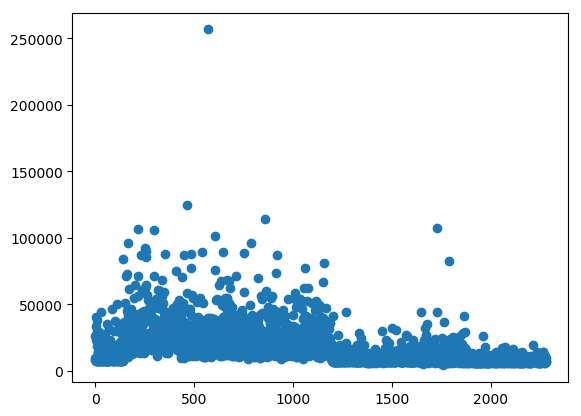

PyObject <matplotlib.collections.PathCollection object at 0x2247b4c90>

In [511]:
sequential = zeros(length(BronxData[:, 1]), 1)
row = 1

while row < length(BronxData[:, 1])
    sequential[row] = row
    row = row + 1
end

scatter(sequential, BronxData[:, :Total_Charges])

#plot(Q, A[:, 2], label = "Length_of_Stay")

#hist(BronxData[:, :Total_Charges], 10)



In [512]:
#PyPlot.plt.hist(BronxData[:, :Total_Charges], 10)



In [513]:
xData = BronxData
yData = xData[:, :Total_Charges]
xData = delete!(xData, :Total_Charges)

labelList = Symbol[]
for i=1:21
    push!(labelList, names(xData)[i])
end
labelList

xData = convert(Array, xData)
yData = convert(Array, yData)

fullData = [copy(xData[:, :]) yData]
fullDataShuffled = fullData[shuffle(1:end), :]

fullDataShuffled


writedlm("fullShuffledDataBronx.txt", fullDataShuffled)


#fullDataShuffled = readtable("fullShuffledDataBronx.txt", separator = '\t')
#fullDataShuffled = convert(Array, fullDataShuffled)


xTrain = fullDataShuffled[1:1823, 1:21]
xTrain = [copy(xTrain[:, :]) ones(length(xTrain[:,1]))]
yTrain = fullDataShuffled[1:1823, 22]


writedlm("xTrainBronx.txt", xTrain)
writedlm("yTrainBronx.txt", yTrain)


xTest = fullDataShuffled[1824:2279, 1:21]
xTest = [copy(xTest[:, :]) ones(length(xTest[:,1]))]
yTest = fullDataShuffled[1824: 2279, 22]

writedlm("xTestBronx.txt", xTest)
writedlm("yTestBronx.txt", yTest)


w = xTrain\yTrain

#=
xTrain1 = Float64[]
yTrain1 = Float64[]

xTest1 = Float64[]
yTest1 = Float64[]

for i = 1:length(kFoldArray[1])
    push!(xTrain1, fullDataShuffled[i, 1:21])
    push!(yTrain1, fullDataShuffled[i, 22])
end
xTrain1
=#

22-element Array{Float64,1}:
  -246.709 
  7833.66  
  1085.46  
    33.8134
   584.064 
 -1307.39  
  2790.36  
 -8018.97  
 -4938.82  
 13182.7   
  9220.57  
 -4111.66  
     0.0   
 -6641.24  
  -520.551 
  -786.842 
  2122.77  
  2305.89  
  2766.86  
     0.0   
     0.0   
 -1307.39  

In [514]:
fullDataShuffled[1, :]

22-element Array{Float64,1}:
     3.0
     1.0
     2.0
     2.0
     0.0
     1.0
     1.0
     0.0
     0.0
     0.0
     1.0
     0.0
     0.0
     0.0
     0.0
     1.0
     0.0
     1.0
     0.0
     0.0
     0.0
 17934.3

In [515]:
for i=1:21
    println(labelList[i])
    println(w[i])
end
w[22]

Age_Group
-246.7087060176351
Length_of_Stay
7833.661760369019
Type_of_Admission
1085.457820443534
APR_Severity_of_Illness_Code
33.81335546049455
APR_Risk_of_Mortality
584.0644468809708
APR_Medical_Surgical_Description
-1307.3926690164903
Emergency_Department_Indicator
2790.358900594308
BronxLebanonHospitalCenterConcourseDivision
-8018.970573617963
JacobiMedicalCenter
-4938.819276474963
MontefioreMedicalCenterWakefieldHospital
13182.726978740022
MontefioreMedicalCenterHenryLucyMosesDiv
9220.574446669718
LincolnMedicalMentalHealthCenter
-4111.659489908028
CalvaryHospitalInc
0.0
SBHHealthSystem
-6641.244754425265
Male
-520.5506029270446
Female
-786.8420660894442
BlackAfricanAmerican
2122.7736624743025
OtherRace
2305.8892922476625
White
2766.864118029119
Multi
0.0
Unknown
0.0


-1307.3926690165026

In [516]:
#**************************************** Calculate Prediction ****************************************#
function calculatePrediction(x, w)
    prediction = 0
    x = convert(Array, x)
    w = convert(Array, w)
    for index = 1: 21
        prediction = prediction + w[index]*x[index]
    end
    return (prediction + w[22])
end

#**************************************** Calculate Error Function ****************************************#


#Calculating error percentage error

function calculateError(x,y,w)
    prediction = 0
    predictionList = Float64[]
    errorList = Float64[]
    
    for row = 1: length(x[:, 1])
        xArray = convert(Array, x[row, :])
        #y = convert(Array, y[row, :])
        prediction = calculatePrediction(xArray, w)
        error = (abs(prediction - y[row])/(y[row])) * 100
        push!(errorList, error)
    end
    
    errorSum = 0
    for n = 1: length(errorList[: , 1])
        errorSum = errorSum + errorList[n]
    end
    
    return (errorSum/length(errorList[: , 1]))
end


#****************************************** Calculate Range Error  ******************************************#


function calculateRangeError(x,y,w)
    prediction = 0
    predictionList = Float64[]
    errorList = Float64[]

    #errorList = Float64[]
    
    for row = 1: length(x[:, 1])
        xArray = convert(Array, x[row, :])
        prediction = calculatePrediction(xArray, w)
        if (prediction < 0.9 * y[row])
            actual = y[row] * 0.9
            error = (abs(prediction - actual)/(actual)) * 100
            push!(errorList, error)
        elseif (prediction > 1.1 * y[row])
            actual = y[row] * 1.1
            error = (abs(prediction - actual)/(actual)) * 100
            push!(errorList, error)
        else
            error = (abs(prediction - y[row])/(y[row])) * 100
            push!(errorList, error)
        end
    end
    
    errorSum = 0
    for n = 1: length(errorList[: , 1])
        errorSum = errorSum + errorList[n]
    end
    
    return (errorSum/length(x[:, 1]))
end

#****************************************** Calculate Correct Error   ******************************************#


function calculateCorrectError(x,y,w)
    prediction = 0
    predictionList = Float64[]
    correct = 0

    for row = 1: length(x[:, 1])
        xArray = convert(Array, x[row, :])
        prediction = calculatePrediction(xArray, w)
        if (prediction > 0.8 * y[row] && prediction < 1.2 * y[row])
            correct = correct + 1
        end
    end
    return (correct/length(x[:, 1]))
end

#*************************************** Calculate Root Mean Square Error  ***************************************#


function calculateRMSE(x,y,w)
    prediction = 0
    predictionList = Float64[]
    errorList = Float64[]

    #errorList = Float64[]
    
    for row = 1: length(x[:, 1])
        xArray = convert(Array, x[row, :])
        prediction = calculatePrediction(xArray, w)
        error = (prediction - y[row])^2 
        push!(errorList, error)
    end
    
    errorSum = 0
    for n = 1: length(errorList[: , 1])
        errorSum = errorSum + errorList[n]
    end
    
    mse = errorSum/(length(x[:, 1]))
    rmse = sqrt(mse)
    return rmse
end


#*************************************** Calculate RSquare  ***************************************#


function calculateRSquare(x,y,w)
    prediction = 0
    predictionList = Float64[]
    errorListSSE = Float64[]
    errorListSSTO = Float64[]
    
    trueMean = 0
    for row = 1: length(y[:, 1])
       trueMean = trueMean + y[row]
    end
    trueMean = trueMean/(length(y[:, 1]))
    

    for row = 1: length(x[:, 1])
        xArray = convert(Array, x[row, :])
        prediction = calculatePrediction(xArray, w)
        errorSSE = (prediction - y[row])^2 
        errorSSTO = (trueMean - y[row])^2
        push!(errorListSSE, errorSSE)
        push!(errorListSSTO, errorSSTO)
    end
    
    SSE = 0
    for n = 1: length(errorListSSE[: , 1])
        SSE = SSE + errorListSSE[n]
    end
    
    SSTO = 0
    for n = 1: length(errorListSSTO[: , 1])
        SSTO = SSTO + errorListSSTO[n]
    end
    
    rSquare = 1 - (SSE/SSTO)
    return rSquare
end


#**************************************** Testing Error Function ****************************************#
#Calculating error percentage error

function testingCalculateError(x,y,w)
    prediction = 0
    predictionList = Float64[]
    errorList = Float64[]
    
    for row = 1:2
        xArray = convert(Array, x[row, :])
        prediction = calculatePrediction(xArray, w)
        push!(predictionList, prediction)
        error = (abs(prediction - y[row])/(y[row])) * 100
        push!(errorList, error)
    end
    
    errorSum = 0
    for n = 1: length(errorList[: , 1])
        errorSum = errorSum + errorList[n]
    end
    
    #= Debugging to check error function is correct
    println("predictionList")
    println(predictionList)
    println("errorList")
    println(errorList)
    =#
    
    return (errorSum/length(errorList[: , 1]))
end

#**************************************** Percent Error for Backslash Operator ******************************#
#=
println("First Test Prediction")
println(calculatePrediction(xTest[1, :], w))
println("First Test Actual Value")
println(yTest[1])

println("One-Two Test Percent Error:")
println(calculateError(xTest[1:2, :], yTest[1:2, :], w))
=#

#=
for i = 1:length(xTrain[:, 1])
    println(calculatePrediction(xTest[i, :], w))
    println(yTest[i])
end
=#

println("Overall Training Error for just Backslash w")
println(calculateError(xTrain[:, :], yTrain[:, :], w))
    
println("Overall Training Range Error for just Backslash w")
println(calculateRangeError(xTrain[:, :], yTrain[:, :], w))

println("Overall Test Error for just Backslash w")
println(calculateError(xTest[:, :], yTest[:, :], w))
    
println("Overall Test Range Error for just Backslash w")
println(calculateRangeError(xTest[:, :], yTest[:, :], w))


println("RMSE")
println(calculateRMSE(xTest[:, :], yTest[:, :], w))

println("rSquare")
println(calculateRSquare(xTest[:, :], yTest[:, :], w))

println("correctError")
println(calculateCorrectError(xTest[:, :], yTest[:, :], w))



#=
for i = 1:5
    xRow = convert(Array, xTrain[i, :])
    println("Prediction")
    println(calculatePrediction(xRow, w))
    println("Actual")
    println(yTrain[i])
end

println("Overall Training Error for just first 5 Backslash w")
println(calculateError(xTrain[1:5, :], yTrain[:, :], w))
println("Overall Range Training Error for just first 5 Backslash w")
println(calculateRangeError(xTrain[1:5, :], yTrain[:, :], w))
=#


Overall Training Error for just Backslash w
28.341450355817283
Overall Training Range Error for just Backslash w
20.834483554507948
Overall Test Error for just Backslash w
27.606062267366944
Overall Test Range Error for just Backslash w
20.16682256068997
RMSE
6697.192671910924
rSquare
0.7920344172976866
correctError
0.4649122807017544


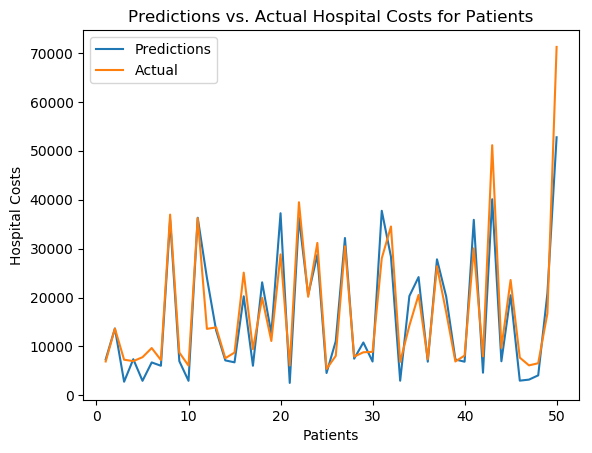

PyObject <matplotlib.legend.Legend object at 0x20f4bfe90>

In [517]:
sequential = Float64[]
for i = 1:50
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:50
        push!(predictionList, calculatePrediction(xTest[i, :], w))
    end
predictionList

plot(sequential, predictionList, label = "Predictions")
plot(sequential, yTest[1:50], label = "Actual")

xlabel("Patients")
ylabel("Hospital Costs")
title("Predictions vs. Actual Hospital Costs for Patients")
legend()

# L1 Loss Regression - L1 Loss Function with No Regularizer

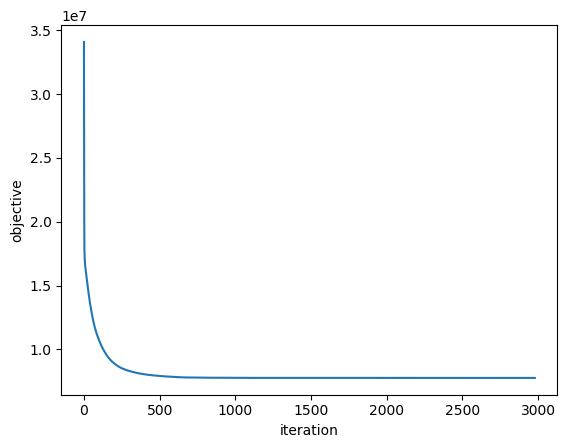

22-element Array{Float64,1}:
  -118.612 
  6448.86  
  1529.02  
   124.285 
    35.8882
   680.774 
    52.2561
 -5328.89  
 -3569.62  
 10484.2   
  7801.66  
 -4051.56  
     0.0   
 -4655.06  
   424.553 
   256.221 
   300.993 
   397.209 
   154.772 
     0.0   
     0.0   
   680.774 

In [518]:
#xTrain = convert(Array, xTrain)
#xTrain = convert(Array{Float64,2}, xTrain)

ch = ConvergenceHistory("L1Loss")
w_l1 = proxgrad(L1Loss(), ZeroReg(), xTrain, yTrain; stepsize=.1, maxiters = 3000, ch = ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

w_l1

# Plot for Training Data for w_l1 - Actual

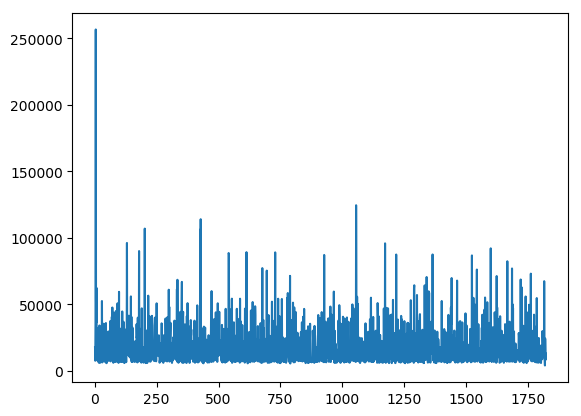

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x223f3fd10>

In [519]:
sequential = Float64[]
for i = 1: length(yTrain[:, 1])  #50
    push!(sequential, i)
end

#=
predictionList = Float64[]
    for i = 1:length(yTrain[:, 1])
        push!(predictionList, calculatePrediction(xTrain[i, :], w_l1))
    end
predictionList
=#

#plot(sequential, predictionList)
plot(sequential, yTrain)

# Plot for Training Data for w_l1 - Predictions

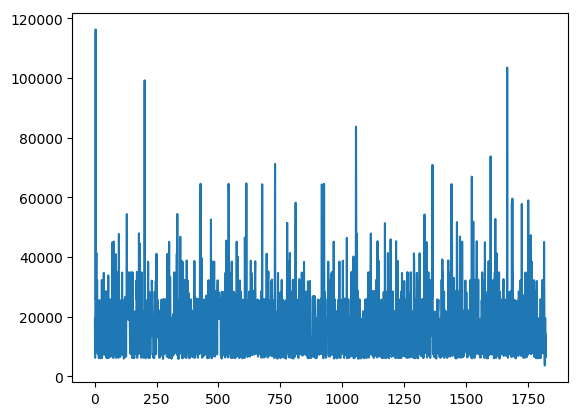

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x224657310>

In [520]:
sequential = Float64[]
for i = 1: length(yTrain[:, 1])  #50
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:length(yTrain[:, 1])
        push!(predictionList, calculatePrediction(xTrain[i, :], w_l1))
    end
predictionList

plot(sequential, predictionList)
#plot(sequential, yTrain)

# Plot for Test Data for w_l1 - Actual

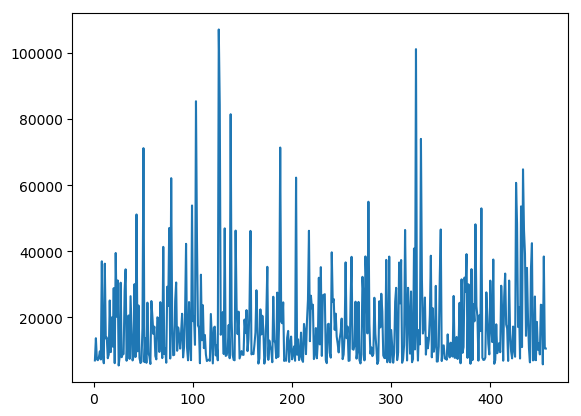

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x224a16dd0>

In [521]:
sequential = Float64[]
for i = 1: length(yTest[:, 1])
    push!(sequential, i)
end

#=
predictionList = Float64[]
    for i = 1:length(yTest[:, 1])
        push!(predictionList, calculatePrediction(xTest[i, :], w_l1))
    end
predictionList
=#

#plot(sequential, predictionList)
plot(sequential, yTest)

# Plot for Test Data for w_l1 - Prediction

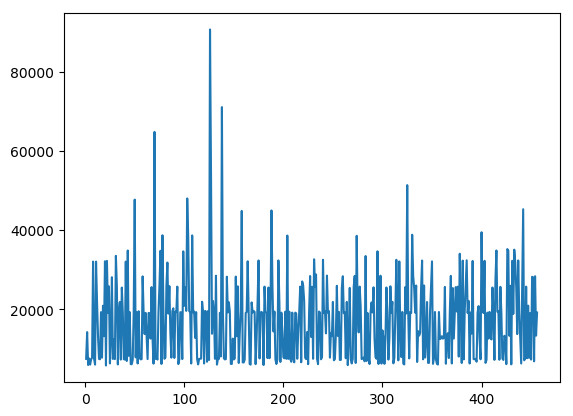

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2319bcf10>

In [522]:
predictionList = Float64[]
    for i = 1:length(yTest[:, 1])
        push!(predictionList, calculatePrediction(xTest[i, :], w_l1))
    end
predictionList


plot(sequential, predictionList)

# Plot for Test Data for w_l1 -  Actual & Predictions

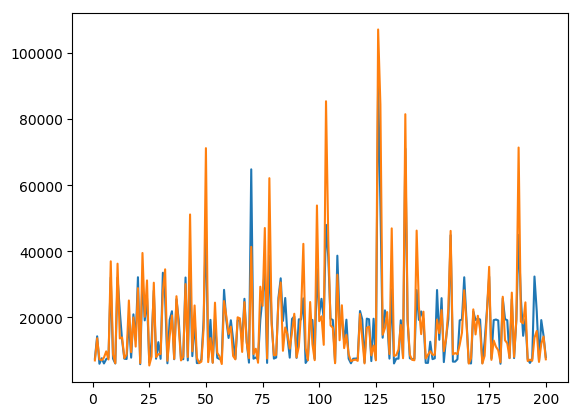

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x22f839c10>

In [523]:
#= FOR ALL
sequential = Float64[]
for i = 1:length(yTest[:, 1])
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:length(yTest[:, 1])
        push!(predictionList, calculatePrediction(xTest[i, :], w_l1))
    end
predictionList

plot(sequential, predictionList)
plot(sequential, yTest[:, :])
=#

sequential = Float64[]
for i = 1:200
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:200
        push!(predictionList, calculatePrediction(xTest[i, :], w_l1))
    end
predictionList

plot(sequential, predictionList)
plot(sequential, yTest[1:200])

# Plot for Training Data for w_l1 - First 50 Actual

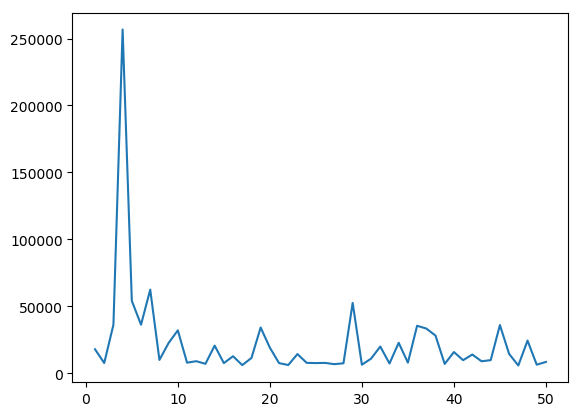

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23a659590>

In [524]:
sequential = Float64[]
for i = 1: 50
    push!(sequential, i)
end


predictionList = Float64[]
    for i = 1:50
        push!(predictionList, calculatePrediction(xTrain[i, :], w_l1))
    end
predictionList


#plot(sequential, predictionList)
plot(sequential, yTrain[1:50])

# Plot for Training Data for w_l1 - First 50 Predictions

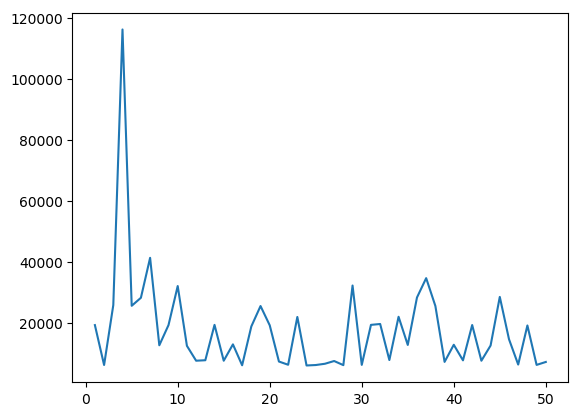

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23b28ca50>

In [525]:
sequential = Float64[]
for i = 1:50
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:50
        push!(predictionList, calculatePrediction(xTrain[i, :], w_l1))
    end
predictionList

plot(sequential, predictionList)
#plot(sequential, yTrain)

# Plot for Training Data for w_l1 - First 50 Actual & Predictions


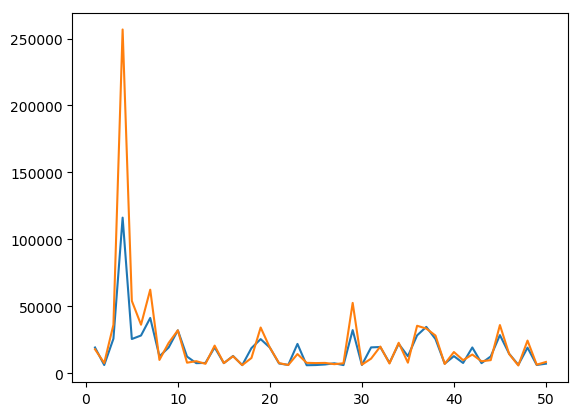

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23c220590>

In [526]:
sequential = Float64[]
for i = 1:50
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:50
        push!(predictionList, calculatePrediction(xTrain[i, :], w_l1))
    end
predictionList

plot(sequential, predictionList)
plot(sequential, yTrain[1:50])

# Plot for Test Data for w_l1 - First 50 Actual

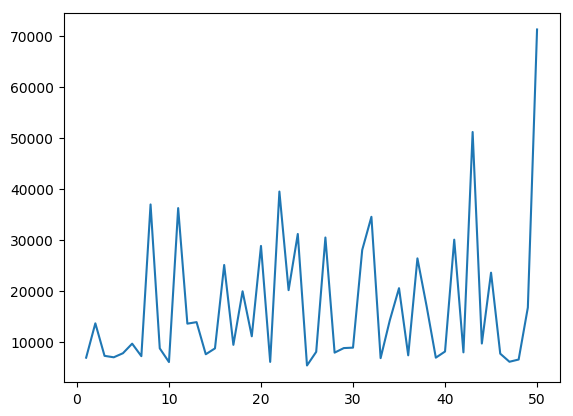

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23c29e4d0>

In [527]:
sequential = Float64[]
for i = 1: 50
    push!(sequential, i)
end

#=
predictionList = Float64[]
    for i = 1:length(yTest[:, 1])
        push!(predictionList, calculatePrediction(xTest[i, :], w_l1))
    end
predictionList
=#

#plot(sequential, predictionList)
plot(sequential, yTest[1:50])

# Plot for Test Data for w_l1 - First 50 Predictions


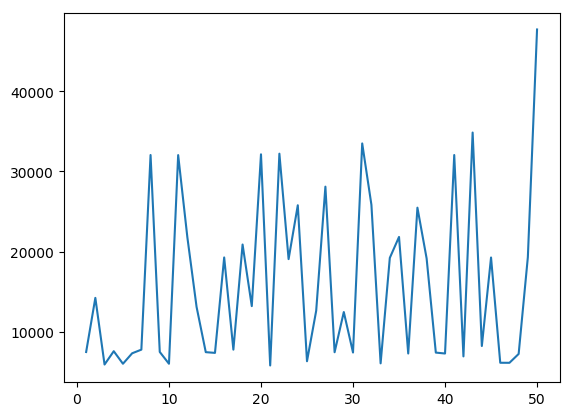

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23c403550>

In [528]:
sequential = Float64[]
for i = 1:50
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:50
        push!(predictionList, calculatePrediction(xTest[i, :], w_l1))
    end
predictionList

plot(sequential, predictionList)
#plot(sequential, yTrain)

# Plot for Test Data for w_l1 - First 50 Actual & Predictions

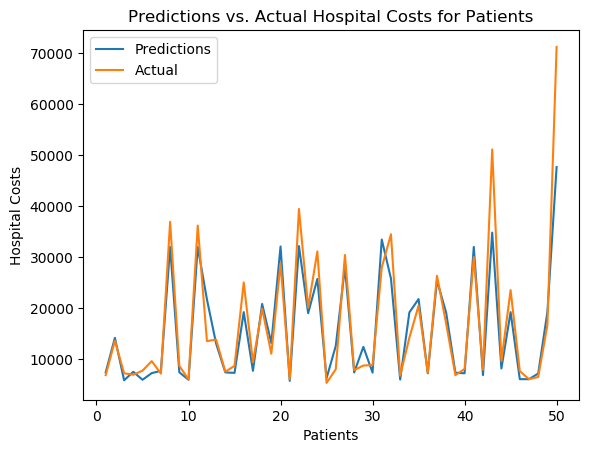

PyObject <matplotlib.legend.Legend object at 0x23c55ec10>

In [529]:
sequential = Float64[]
for i = 1:50
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:50
        push!(predictionList, calculatePrediction(xTest[i, :], w_l1))
    end
predictionList

plot(sequential, predictionList, label = "Predictions")
plot(sequential, yTest[1:50], label = "Actual")

xlabel("Patients")
ylabel("Hospital Costs")
title("Predictions vs. Actual Hospital Costs for Patients")
legend()

# Training & Test Error with L1 Objective Loss Function & No Regularization (First 50)

In [530]:
println("First 50 Training Error with L1 Objective Loss Function")
println(calculateError(xTrain[1:50, :], yTrain[1:50, :], w_l1))

println("First 50 Test Error with L1 Objective Loss Function")
println(calculateError(xTest[1:50, :], yTest[1:50, :], w_l1))

First 50 Training Error with L1 Objective Loss Function
20.09335460707928
First 50 Test Error with L1 Objective Loss Function
15.617350730359915


# Training & Test Error with L1 Objective Loss Function & No Regularization (Overall)

In [531]:
println("Training Error with L1 Objective Loss Function")
println(calculateError(xTrain, yTrain, w_l1))

println("Test Error with L1 Objective Loss Function")
println(calculateError(xTest, yTest, w_l1))

println("Train RangeError with L1 Objective Loss Function")
println(calculateRangeError(xTrain, yTrain, w_l1))

println("Test RangeError with L1 Objective Loss Function")
println(calculateRangeError(xTest, yTest, w_l1))

println("RSquare Value")
println(calculateRSquare(xTest, yTest, w_l1))

println("Root Mean Square Error")
println(calculateRMSE(xTest, yTest, w_l1))

println("correctError")
println(calculateCorrectError(xTest[:, :], yTest[:, :], w_l1))

Training Error with L1 Objective Loss Function
21.27658122039341
Test Error with L1 Objective Loss Function
21.014150392288496
Train RangeError with L1 Objective Loss Function
14.669536303986709
Test RangeError with L1 Objective Loss Function
14.384237903705706
RSquare Value
0.7603107919824066
Root Mean Square Error
7189.8743366210665
correctError
0.6162280701754386


# L1 Loss  L1 Regularizer Regression - L1 Loss Function with L1 Regularizer

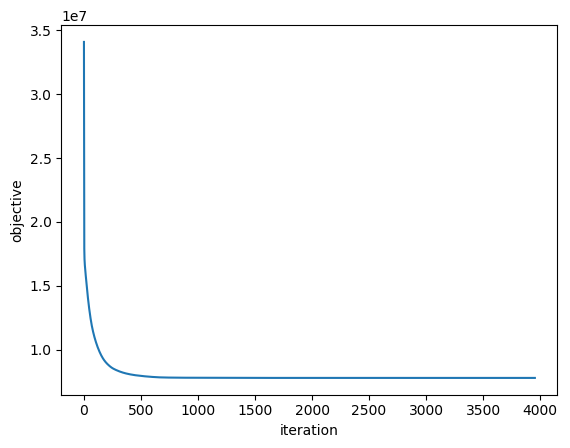

22-element Array{Float64,1}:
  -101.845 
  6456.7   
  1542.63  
   118.535 
    29.8906
   641.256 
   125.188 
 -5281.3   
 -3536.19  
 10551.6   
  7821.04  
 -4003.92  
     0.0   
 -4622.85  
   357.587 
   185.361 
   246.978 
   352.669 
   108.894 
     0.0   
     0.0   
   641.256 

In [532]:
ch = ConvergenceHistory("L1LossL1Reg")

lambda = 0.1
w_l1_r1 = proxgrad(L1Loss(), OneReg(lambda), xTrain, yTrain; stepsize=.1, maxiters = 4000, ch = ch)

#lambda = 0.1
#w_l1_r1 = proxgrad(L1Loss(), OneReg(lambda), xTrain, yTrain; stepsize=.1, maxiters = 4000, ch = ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

w_l1_r1

In [533]:
for i=1:20
    println(labelList[i])
    println(w_l1_r1[i])
end
println(w_l1_r1[21])

Age_Group
-101.84482921003033
Length_of_Stay
6456.702632672575
Type_of_Admission
1542.627947570262
APR_Severity_of_Illness_Code
118.53544744737452
APR_Risk_of_Mortality
29.89056831588889
APR_Medical_Surgical_Description
641.2559572349545
Emergency_Department_Indicator
125.18802343570357
BronxLebanonHospitalCenterConcourseDivision
-5281.2999481113
JacobiMedicalCenter
-3536.1900827509103
MontefioreMedicalCenterWakefieldHospital
10551.605981703278
MontefioreMedicalCenterHenryLucyMosesDiv
7821.03776915701
LincolnMedicalMentalHealthCenter
-4003.9192147843873
CalvaryHospitalInc
0.0
SBHHealthSystem
-4622.854498327577
Male
357.58708710405114
Female
185.36085358067032
BlackAfricanAmerican
246.97771689959984
OtherRace
352.66860626119603
White
108.89360097373029
Multi
0.0
0.0


# Errors with L1 Loss L1 Regularizer Regression - L1 Loss Function with L1 Regularizer (First 50)

In [534]:
println("Training Error with L1 Objective Loss Function")
println(calculateError(xTrain[1:50, :], yTrain[1:50, :], w_l1_r1))

println("Test Error with L1 Objective Loss Function")
println(calculateError(xTest[1:50, :], yTest[1:50, :], w_l1_r1))

Training Error with L1 Objective Loss Function
20.08869261084576
Test Error with L1 Objective Loss Function
15.600685780119033


# Errors with L1 Loss L1 Regularizer Regression - L1 Loss Function with L1 Regularizer (Overall)

In [535]:
println("Training Error with L1 Objective Loss Function & L1 Regularizer")
println(calculateError(xTrain, yTrain, w_l1_r1))

println("Test Error with L1 Objective Loss Function & L1 Regularizer")
println(calculateError(xTest, yTest, w_l1_r1))

println("Training RangeError with L1 Objective Loss Function")
println(calculateRangeError(xTrain, yTrain, w_l1_r1))

println("Test RangeError with L1 Objective Loss Function")
println(calculateRangeError(xTest, yTest, w_l1_r1))

println("rSquare Error")
println(calculateRSquare(xTest, yTest, w_l1_r1))

println("RMSE")
println(calculateRMSE(xTest, yTest, w_l1))

Training Error with L1 Objective Loss Function & L1 Regularizer
21.266767074572286
Test Error with L1 Objective Loss Function & L1 Regularizer
21.00023456765939
Training RangeError with L1 Objective Loss Function
14.68192309802773
Test RangeError with L1 Objective Loss Function
14.398737184758131
rSquare Error
0.760347622566905
RMSE
7189.8743366210665


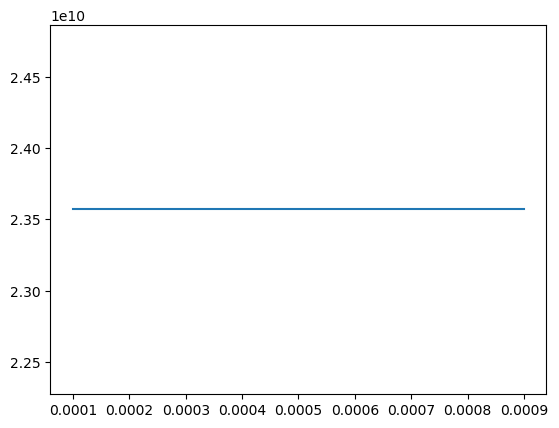

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23cc29310>

In [536]:
lambda = 0.0001
error = Float64[]
lambdas = Float64[]

while lambda < 0.001
    w_l1_r1 = proxgrad(L1Loss(), OneReg(lambda), xTrain, yTrain; stepsize=.1, maxiters = 4000, ch = ch)
    push!(error, sum((yTest - xTest*w_l1_r1).^2))
    push!(lambdas, lambda)
    lambda = lambda + 0.0001
end
#println(error)
#println(lambdas)
plot(lambdas, error)

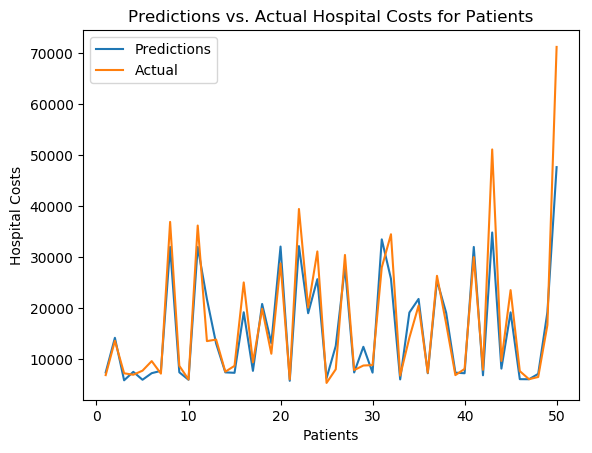

PyObject <matplotlib.legend.Legend object at 0x23cd8fe10>

In [537]:
sequential = Float64[]
for i = 1:50
    push!(sequential, i)
end

predictionList = Float64[]
    for i = 1:50
        push!(predictionList, calculatePrediction(xTest[i, :], w_l1_r1))
    end
predictionList

plot(sequential, predictionList, label = "Predictions")
plot(sequential, yTest[1:50], label = "Actual")

xlabel("Patients")
ylabel("Hospital Costs")
title("Predictions vs. Actual Hospital Costs for Patients")
legend()

# L1 Loss with Quad Regularizer Regression

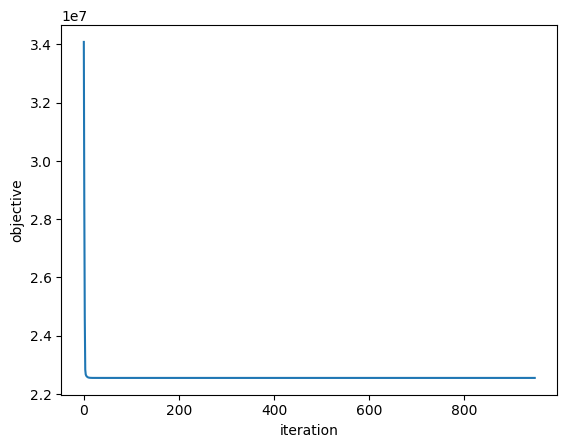

22-element Array{Float64,1}:
 1094.38   
 1010.87   
  807.0    
  681.088  
  126.453  
  403.75   
  375.799  
  -54.1942 
   15.0512 
  123.237  
  298.862  
   -7.24357
    0.0    
   28.0382 
  174.995  
  228.755  
  150.476  
  199.307  
   54.9606 
    0.0    
    0.0    
  403.75   

In [538]:
ch = ConvergenceHistory("L1LossQuadReg")

lambda = 1
w_l1_qr = proxgrad(L1Loss(), QuadReg(lambda), xTrain, yTrain; stepsize=.1, maxiters = 1000, ch = ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

w_l1_qr

In [539]:
println("Overall Training Error with L1 Objective Loss Function & Quad Regularizer")
println(calculateError(xTrain, yTrain, w_l1_qr))

println("Overall Test Error with L1 Objective Loss Function & Quad Regularizer")
println(calculateError(xTest, yTest, w_l1_qr))

Overall Training Error with L1 Objective Loss Function & Quad Regularizer
38.39979151525718
Overall Test Error with L1 Objective Loss Function & Quad Regularizer
38.49671255194673


# L1 Loss with Nonegative Constraint

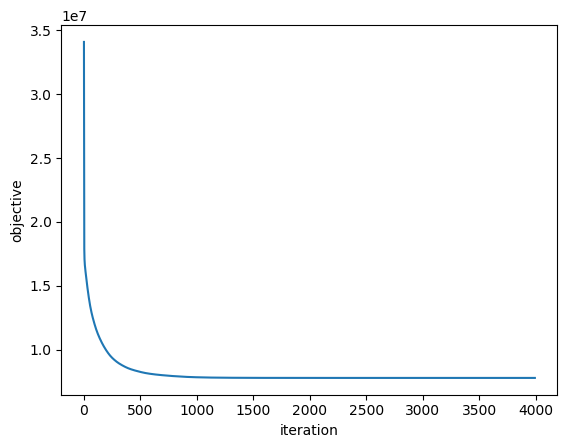

22-element Array{Float64,1}:
     0.0   
  6267.29  
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   
  1403.85  
 16028.4   
 12970.4   
  1084.89  
     0.0   
   307.822 
    97.7125
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   

In [540]:
ch = ConvergenceHistory("L1LossL1Reg")

lambda = 6
w_l1_nc = proxgrad(L1Loss(), NonNegConstraint(), xTrain, yTrain; stepsize=.1, maxiters = 4000, ch = ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

w_l1_nc

In [541]:
for i=1:21
    println(labelList[i])
    println(w_l1_nc[i])
end
w_l1_nc[22]    

Age_Group
0.0
Length_of_Stay
6267.287499999813
Type_of_Admission
0.0
APR_Severity_of_Illness_Code
0.0
APR_Risk_of_Mortality
0.0
APR_Medical_Surgical_Description
0.0
Emergency_Department_Indicator
0.0
BronxLebanonHospitalCenterConcourseDivision
0.0
JacobiMedicalCenter
1403.8468749999618
MontefioreMedicalCenterWakefieldHospital
16028.36718749878
MontefioreMedicalCenterHenryLucyMosesDiv
12970.42343749994
LincolnMedicalMentalHealthCenter
1084.8921875001686
CalvaryHospitalInc
0.0
SBHHealthSystem
307.82187500000816
Male
97.71250000000254
Female
0.0
BlackAfricanAmerican
0.0
OtherRace
0.0
White
0.0
Multi
0.0
Unknown
0.0


0.0

In [543]:
println("Overall Training Error with L1 Objective Loss Function & Non-Negative Constraint")
println(calculateError(xTrain, yTrain, w_l1_nc))
println(calculateRangeError(xTrain, yTrain, w_l1_nc))


println("Overall Test Error with L1 Objective Loss Function & Non-Negative Constraint")
println(calculateError(xTest, yTest, w_l1_nc))
println(calculateRangeError(xTest, yTest, w_l1_nc))

println("RSquare Value")
println(calculateRSquare(xTest, yTest, w_l1_nc))

println("Root Mean Square Error")
println(calculateRMSE(xTest, yTest, w_l1_nc))


Overall Training Error with L1 Objective Loss Function & Non-Negative Constraint
21.196411762878906
14.674970046115185
Overall Test Error with L1 Objective Loss Function & Non-Negative Constraint
20.884406379646897
14.47359137044309
RSquare Value
0.7561208768714696
Root Mean Square Error
7252.4438008320085


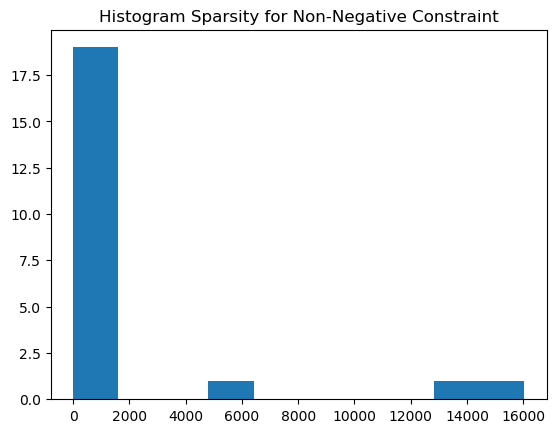

PyObject Text(0.5,1,u'Histogram Sparsity for Non-Negative Constraint')

In [544]:
plt[:hist](w_l1_nc)
title("Histogram Sparsity for Non-Negative Constraint")

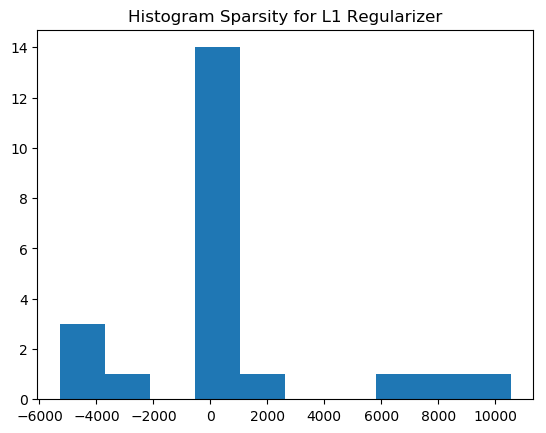

PyObject Text(0.5,1,u'Histogram Sparsity for L1 Regularizer')

In [545]:
plt[:hist](w_l1_r1)
title("Histogram Sparsity for L1 Regularizer")

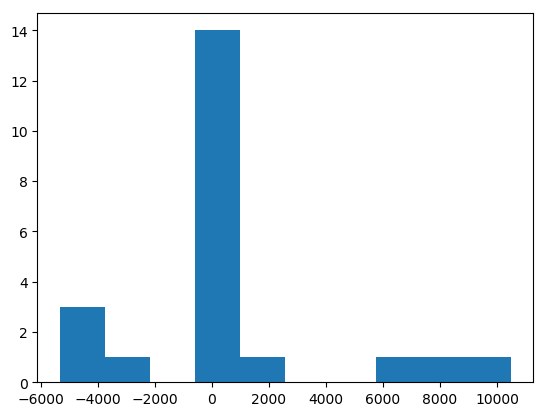

([3.0, 1.0, 0.0, 14.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0], [-5328.89, -3747.58, -2166.26, -584.948, 996.366, 2577.68, 4158.99, 5740.31, 7321.62, 8902.94, 10484.2], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x23d51c9d0>, PyObject <matplotlib.patches.Rectangle object at 0x23d51c790>, PyObject <matplotlib.patches.Rectangle object at 0x23d51ccd0>, PyObject <matplotlib.patches.Rectangle object at 0x23d5280d0>, PyObject <matplotlib.patches.Rectangle object at 0x23d528410>, PyObject <matplotlib.patches.Rectangle object at 0x23d528790>, PyObject <matplotlib.patches.Rectangle object at 0x23d528b10>, PyObject <matplotlib.patches.Rectangle object at 0x23d528e90>, PyObject <matplotlib.patches.Rectangle object at 0x23d533250>, PyObject <matplotlib.patches.Rectangle object at 0x23d5335d0>])

In [546]:
plt[:hist](w_l1)

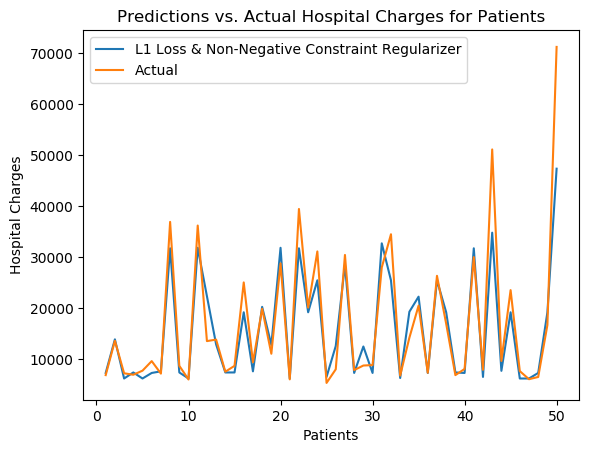

PyObject <matplotlib.legend.Legend object at 0x23dbcf590>

In [556]:
sequential = Float64[]
for i = 1:50
    push!(sequential, i)
end

predictionListL1R1 = Float64[]
    for i = 1:50
        push!(predictionListL1R1, calculatePrediction(xTest[i, :], w_l1_r1))
    end
predictionListL1R1


predictionListL1NC = Float64[]
    for i = 1:50
        push!(predictionListL1NC, calculatePrediction(xTest[i, :], w_l1_nc))
    end
predictionListL1NC


#plot(sequential, predictionListL1R1, label = "L1 Loss & L1 Regularizer")
plot(sequential, predictionListL1NC, label = "L1 Loss & Non-Negative Constraint Regularizer")
plot(sequential, yTest[1:50], label = "Actual")

xlabel("Patients")
ylabel("Hospital Charges")
title("Predictions vs. Actual Hospital Charges for Patients")
legend()

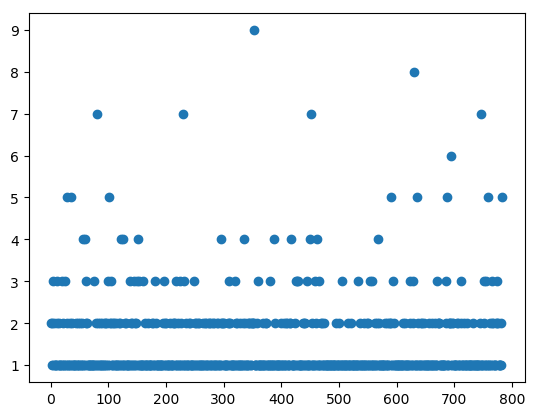

PyObject <matplotlib.collections.PathCollection object at 0x25f143c50>

In [585]:
length(xTrain[:, 1])

#bar(xTrain[:, 4], xTrain[:, 2])
#xlabel("Patient Serverity")
#ylabel("Length of Stay")
#title("Length of Stay for Patient vs. Patient Illness Severity")

#2 = length of stay
#4 = severity

severity1 = Float64[]
for i = 1: length(xTrain[:, 2])
    if (xTrain[i, 4] == 1)
        push!(severity1, xTrain[i, 2])
    end
end

sequential1 = Float64[]
for i = 1:length(severity1[:, 1])
    push!(sequential1, i)
end

scatter(sequential1, severity1)

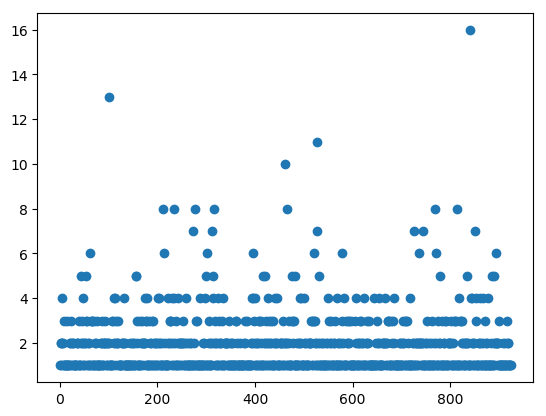

PyObject <matplotlib.collections.PathCollection object at 0x25f2b04d0>

In [586]:
severity2 = Float64[]
for i = 1: length(xTrain[:, 2])
    if (xTrain[i, 4] == 2)
        push!(severity2, xTrain[i, 2])
    end
end

sequential2 = Float64[]
for i = 1:length(severity2[:, 1])
    push!(sequential2, i)
end

scatter(sequential2, severity2)

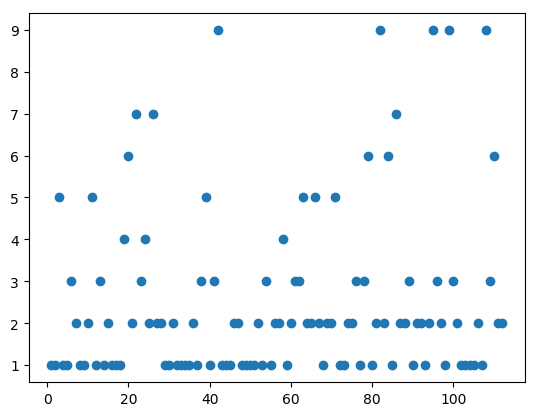

PyObject <matplotlib.collections.PathCollection object at 0x25f4093d0>

In [587]:
severity3 = Float64[]
for i = 1: length(xTrain[:, 2])
    if (xTrain[i, 4] == 3)
        push!(severity3, xTrain[i, 2])
    end
end

sequential3 = Float64[]
for i = 1:length(severity3[:, 1])
    push!(sequential3, i)
end

scatter(sequential3, severity3)

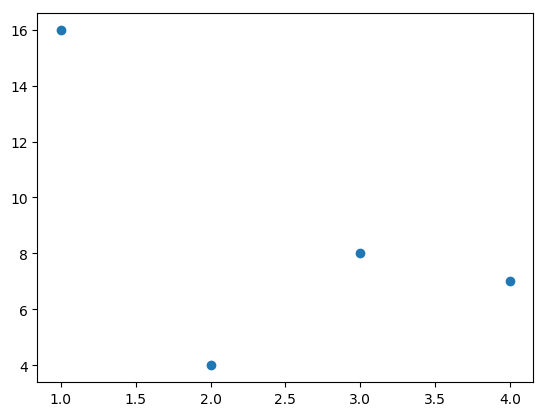

PyObject <matplotlib.collections.PathCollection object at 0x25f55ecd0>

In [588]:
severity4 = Float64[]
for i = 1: length(xTrain[:, 2])
    if (xTrain[i, 4] == 4)
        push!(severity4, xTrain[i, 2])
    end
end

sequential4 = Float64[]
for i = 1:length(severity4[:, 1])
    push!(sequential4, i)
end

scatter(sequential4, severity4)

129
186
13
1495
1823
0.8272078990674712
0.947888096544158
0.8765770707624795
1

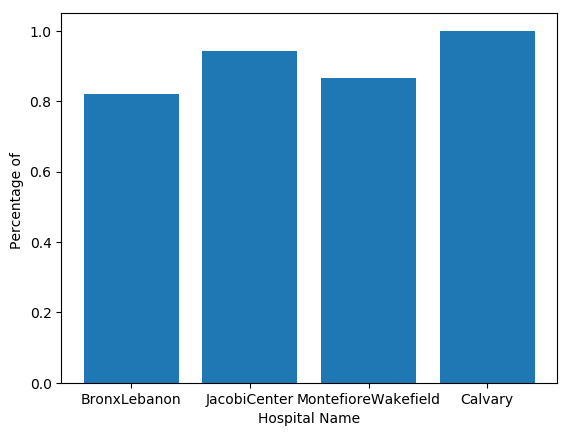

.0
33
0
43
1823


PyObject Text(24,0.5,u'Percentage of ')

In [670]:
numberOfSeverity1BL = 0
numberOfSeverity2BL = 0
numberOfSeverity3BL = 0
numberOfSeverity4BL = 0

#BronxLebanon
for i = 1: length(xTrain[:, 8])
    if (xTrain[i, 8] == 1 && xTrain[i, 4] == 1)
        numberOfSeverity1BL = numberOfSeverity1BL + 1
    elseif (xTrain[i, 8] == 1 && xTrain[i, 4] == 2)
        numberOfSeverity2BL = numberOfSeverity2BL + 1
    elseif(xTrain[i, 8] == 1 && xTrain[i, 4] == 3)
        numberOfSeverity3BL = numberOfSeverity3BL + 1
    else(xTrain[i, 8] == 1 && xTrain[i, 4] == 4)
        numberOfSeverity4BL = numberOfSeverity4BL + 1
    end
end
println(numberOfSeverity18)
println(numberOfSeverity28)
println(numberOfSeverity38)
println(numberOfSeverity48)
println(length(xTrain[:, 8]))
println((numberOfSeverity48 + numberOfSeverity38)/length(xTrain[:, 8]))


#Jacobi Medical Center
numberOfSeverity19 = 0
numberOfSeverity29 = 0
numberOfSeverity39 = 0
numberOfSeverity49 = 0

for i = 1: length(xTrain[:, 9])
    if (xTrain[i, 9] == 1 && xTrain[i, 4] == 1)
        numberOfSeverity19 = numberOfSeverity19 + 1
    elseif (xTrain[i, 9] == 1 && xTrain[i, 4] == 2)
        numberOfSeverity29 = numberOfSeverity29 + 1
    elseif(xTrain[i, 9] == 1 && xTrain[i, 4] == 3)
        numberOfSeverity39 = numberOfSeverity39 + 1
        else(xTrain[i, 9] == 1 && xTrain[i, 4] == 4)
        numberOfSeverity49 = numberOfSeverity49 + 1
    end
end
#println(numberOfSeverity1)
#println(numberOfSeverity2)
#println(numberOfSeverity3)
#println(numberOfSeverity4)
#println(length(xTrain[:, 9]))
println((numberOfSeverity49 + numberOfSeverity39)/length(xTrain[:, 9]))


#MontefioreWakefield Center
numberOfSeverity10 = 0
numberOfSeverity20 = 0
numberOfSeverity30 = 0
numberOfSeverity40 = 0

for i = 1: length(xTrain[:, 10])
    if (xTrain[i, 10] == 1 && xTrain[i, 4] == 1)
        numberOfSeverity10 = numberOfSeverity10 + 1
    elseif (xTrain[i, 10] == 1 && xTrain[i, 4] == 2)
        numberOfSeverity20 = numberOfSeverity20 + 1
    elseif(xTrain[i, 10] == 1 && xTrain[i, 4] == 3)
        numberOfSeverity30 = numberOfSeverity30 + 1
        else(xTrain[i, 10] == 1 && xTrain[i, 4] == 4)
        numberOfSeverity40 = numberOfSeverity40 + 1
    end
end
#println(numberOfSeverity1)
#println(numberOfSeverity2)
#println(numberOfSeverity3)
#println(numberOfSeverity40)
#println(length(xTrain[:, 10]))
println((numberOfSeverity40 + numberOfSeverity30)/length(xTrain[:, 10]))


#Calvary Center
numberOfSeverity13 = 0
numberOfSeverity23 = 0
numberOfSeverity33 = 0
numberOfSeverity43 = 0

for i = 1: length(xTrain[:, 10])
    if (xTrain[i, 13] == 1 && xTrain[i, 4] == 1)
        numberOfSeverity10 = numberOfSeverity10 + 1
    elseif (xTrain[i, 13] == 1 && xTrain[i, 4] == 2)
        numberOfSeverity20 = numberOfSeverity20 + 1
    elseif(xTrain[i, 13] == 1 && xTrain[i, 4] == 3)
        numberOfSeverity33 = numberOfSeverity33 + 1
        else(xTrain[i, 13] == 1 && xTrain[i, 4] == 4)
        numberOfSeverity43 = numberOfSeverity43 + 1
    end
end
#println(numberOfSeverity1)
#println(numberOfSeverity2)
#println(numberOfSeverity3)
#println(numberOfSeverity40)
#println(length(xTrain[:, 10]))
println((numberOfSeverity43 + numberOfSeverity33)/length(xTrain[:, 13]))

println("33")
println(numberOfSeverity33)
println("43")
println(numberOfSeverity43)


bar(["BronxLebanon", "JacobiCenter", "MontefioreWakefield", "Calvary"], 
    [numberOfSeverity48/length(xTrain[:, 8]), numberOfSeverity49/length(xTrain[:, 9]), 
        numberOfSeverity40/length(xTrain[:, 10]), numberOfSeverity43/length(xTrain[:, 13]) ])

xlabel("Hospital Name")
ylabel("Percentage of ")



BronxLebanon
1.6676829268292683
severity
1.646341463414634
Jacobi
2.1153846153846154
severity
1.5865384615384615
Montefiore Wakefield
2.032388663967611
severity
1.708502024291498
Montefiore Henry Lucy
1.8130217028380635
severity
1.67779632721202
Lincoln Medical
1.3170731707317074
severity
1.5203252032520325
Calvary Medical
0
severity
NaN
SBH Health


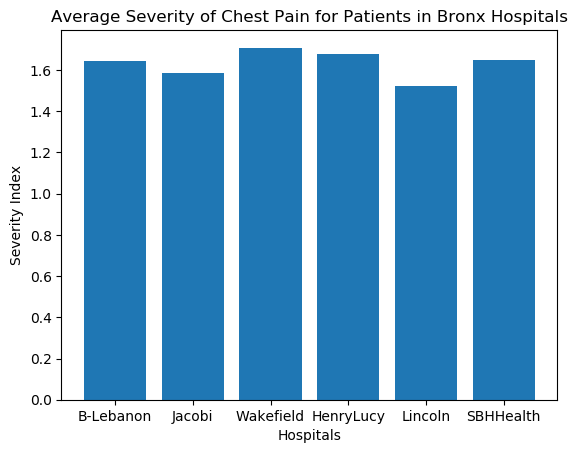

2.0170454545454546
severity
1.6477272727272727


PyObject Text(0.5,1,u'Average Severity of Chest Pain for Patients in Bronx Hospitals')

In [699]:
println("BronxLebanon")
lengthOfStayBL = 0
numBL = 0
sickBL = 0
for i = 1: length(xTrain[:, 8])
    if (xTrain[i, 8] == 1)
        lengthOfStayBL = lengthOfStayBL + xTrain[i, 2]
        sickBL = sickBL + xTrain[i, 4]
        numBL = numBL + 1
    end
end
println(lengthOfStayBL/numBL)
println("severity")
println(sickBL/numBL)



println("Jacobi")
lengthOfStayJ = 0
numJ = 0
sickJ = 0 
for i = 1: length(xTrain[:, 9])
    if (xTrain[i, 9] == 1)
        lengthOfStayJ = lengthOfStayJ + xTrain[i, 2]
        sickJ = sickJ + xTrain[i, 4]
        numJ = numJ + 1
    end
end
println(lengthOfStayJ/numJ)
println("severity")
println(sickJ/numJ)


println("Montefiore Wakefield")
lengthOfStayMW = 0
numMW = 0
sickMW = 0
for i = 1: length(xTrain[:, 10])
    if (xTrain[i, 10] == 1)
        lengthOfStayMW = lengthOfStayMW + xTrain[i, 2]
        sickMW = sickMW + xTrain[i, 4]
        numMW = numMW + 1
    end
end
println(lengthOfStayMW/numMW)
println("severity")
println(sickMW/numMW)


println("Montefiore Henry Lucy")
lengthOfStayHL = 0
numHL = 0
sickHL = 0
for i = 1: length(xTrain[:, 11])
    if (xTrain[i, 11] == 1)
        lengthOfStayHL = lengthOfStayHL + xTrain[i, 2]
        numHL = numHL + 1
        sickHL = sickHL + xTrain[i, 4]
    end
end
println(lengthOfStayHL/numHL)
println("severity")
println(sickHL/numHL)



println("Lincoln Medical")
lengthOfStayL = 0
numL = 0
sickL = 0
for i = 1: length(xTrain[:, 12])
    if (xTrain[i, 12] == 1)
        lengthOfStayL = lengthOfStayL + xTrain[i, 2]
        numL = numL + 1
        sickL = sickL + xTrain[i, 4]
    end
end
println(lengthOfStayL/numL)
println("severity")
println(sickL/numL)


println("Calvary Medical")
lengthOfStayC = 0
numC = 0
sickC = 0 
for i = 1: length(xTrain[:, 13])
    if (xTrain[i, 13] == 1)
        lengthOfStayC = lengthOfStayC + xTrain[i, 2]
        numC = numC + 1
        sickC = sickC + xTrain[i, 4]
    end
end
println(numC)
println("severity")
println(sickC/numC)


println("SBH Health") 
lengthOfStaySB = 0
numSB = 0
sickSB = 0;
for i = 1: length(xTrain[:, 14])
    if (xTrain[i, 14] == 1)
        lengthOfStaySB = lengthOfStaySB + xTrain[i, 2]
        numSB = numSB + 1
        sickSB = sickSB + xTrain[i, 4]
    end
end
println(lengthOfStaySB/numSB)
println("severity")
println(sickSB/numSB)



bar(["B-Lebanon", "Jacobi", "Wakefield", "HenryLucy", "Lincoln", "SBHHealth"],
[1.646341463414634, 1.5865384615384615, 1.708502024291498, 1.67779632721202, 1.5203252032520325, 1.6477272727272727])
xlabel("Hospitals")
ylabel("Severity Index")
title("Average Severity of Chest Pain for Patients in Bronx Hospitals")

# Looking at Huber Loss

In [467]:
w_huber = proxgrad(HuberLoss(), OneReg(), xTrain, yTrain, maxiters=10000)

22-element Array{Float64,1}:
  -201.604 
  6362.17  
  1547.85  
   129.267 
   -89.2232
   594.386 
   879.458 
 -5413.48  
 -3754.37  
 11050.9   
  7967.04  
 -3982.95  
     0.0   
 -4761.32  
   301.608 
   119.621 
   168.327 
   155.611 
   248.833 
     0.0   
     0.0   
   594.386 

In [709]:
println("Overall Training Error with Huber")
println(calculateError(xTrain, yTrain, w_huber))
println(calculateRangeError(xTrain, yTrain, w_huber))


println("Overall Test Error with Huber")
println(calculateError(xTest, yTest, w_huber))
println(calculateRangeError(xTest, yTest, w_huber))

Overall Training Error with Huber
21.32046129351454
14.658828098090588
Overall Test Error with Huber
20.80431626973992
14.078867692493416


In [711]:
w_huberNC = proxgrad(HuberLoss(), NonNegConstraint(), xTrain, yTrain, maxiters=10000)

22-element Array{Float64,1}:
     0.0   
  6223.81  
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   
  1481.99  
 16472.0   
 13185.1   
  1163.82  
     0.0   
   353.892 
    96.0356
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   
     0.0   

In [712]:
println("Overall Training Error with Huber")
println(calculateError(xTrain, yTrain, w_huberNC))
println(calculateRangeError(xTrain, yTrain, w_huberNC))


println("Overall Test Error with Huber")
println(calculateError(xTest, yTest, w_huberNC))
println(calculateRangeError(xTest, yTest, w_huberNC))

Overall Training Error with Huber
21.298872990030983
14.72145178879302
Overall Test Error with Huber
20.94669374424092
14.449347519606798


In [713]:
for i=1:21
    println(labelList[i])
    println(w_huberNC[i])
end
w_huberNC[22]    

Age_Group
0.0
Length_of_Stay
6223.813626766655
Type_of_Admission
0.0
APR_Severity_of_Illness_Code
0.0
APR_Risk_of_Mortality
0.0
APR_Medical_Surgical_Description
0.0
Emergency_Department_Indicator
0.0
BronxLebanonHospitalCenterConcourseDivision
0.0
JacobiMedicalCenter
1481.9851584087132
MontefioreMedicalCenterWakefieldHospital
16471.971579687437
MontefioreMedicalCenterHenryLucyMosesDiv
13185.094158891783
LincolnMedicalMentalHealthCenter
1163.8164338977695
CalvaryHospitalInc
0.0
SBHHealthSystem
353.8915796874345
Male
96.03561091389749
Female
0.0
BlackAfricanAmerican
0.0
OtherRace
0.0
White
0.0
Multi
0.0
Unknown
0.0


0.0

# Looking at Quantile Regression:

In [651]:
w_quantile05 = proxgrad(QuantileLoss(quantile= 0.05), ZeroReg(), xTrain, yTrain, maxiters=10000)

22-element Array{Float64,1}:
    12.5435
  3194.87  
  1026.32  
    57.7866
   131.469 
   513.121 
   885.848 
 -3372.29  
  -496.785 
  3716.33  
  3323.52  
 -1019.38  
     0.0   
 -1638.29  
   239.982 
   273.138 
   280.699 
   277.879 
    66.3301
     0.0   
     0.0   
   513.121 

In [652]:
println("Overall Training Error with Quantile 5%")
println(calculateError(xTrain, yTrain, w_quantile05))

println("Overall Test Error with Quantile 5%")
println(calculateError(xTest, yTest, w_quantile05))

Overall Training Error with Quantile 5%
30.975366616627404
Overall Test Error with Quantile 5%
30.927728455963546


In [653]:
w_quantile25 = proxgrad(QuantileLoss(quantile= 0.25), ZeroReg(), xTrain, yTrain, maxiters=10000)

22-element Array{Float64,1}:
   -33.0264
  5106.66  
  1087.27  
   -10.8045
   159.861 
   579.133 
   727.803 
 -5998.66  
 -1958.24  
  8591.81  
  6137.41  
 -2622.93  
     0.0   
 -3570.26  
   339.2   
   239.933 
   316.699 
   313.797 
   155.637 
     0.0   
     0.0   
   579.133 

In [654]:
println("Overall Training Error with Quantile 25%")
println(calculateError(xTrain, yTrain, w_quantile25))

println("Overall Test Error with Quantile 25%")
println(calculateError(xTest, yTest, w_quantile25))

Overall Training Error with Quantile 25%
22.715558655376157
Overall Test Error with Quantile 25%
22.77621407809942


In [655]:
w_quantile50 = proxgrad(QuantileLoss(quantile= 0.5), ZeroReg(), xTrain, yTrain, maxiters=10000)

22-element Array{Float64,1}:
  -119.007 
  6448.94  
  1531.14  
   123.642 
    36.7469
   680.912 
    49.6893
 -5327.77  
 -3569.73  
 10482.2   
  7801.84  
 -4050.46  
     0.0   
 -4655.14  
   424.328 
   256.584 
   299.88  
   396.467 
   155.315 
     0.0   
     0.0   
   680.912 

In [656]:
println("Overall Training Error with Quantile 50%")
println(calculateError(xTrain, yTrain, w_quantile50))

println("Overall Test Error with Quantile 50%")
println(calculateError(xTest, yTest, w_quantile50))

Overall Training Error with Quantile 50%
21.276342261194213
Overall Test Error with Quantile 50%
21.01415738944837


In [657]:
q = 0.05
A = zeros(19, 22)
i = 1

while q < 1.00
    A[i, :] = proxgrad(QuantileLoss(quantile= q), ZeroReg(), xTrain, yTrain, maxiters=10000)
    i = i + 1
    q = q + 0.05
end

A

19×22 Array{Float64,2}:
   12.5435    3194.87  1026.32    57.7866   …   66.3301  0.0  0.0  513.121
    1.45802   4320.02   866.423   70.3574      122.565   0.0  0.0  459.262
    7.99785   4809.26   842.989   21.4284       88.645   0.0  0.0  438.476
  -18.0905    5050.05   898.046   15.1625       77.8994  0.0  0.0  488.687
  -33.0264    5106.66  1087.27   -10.8045      155.637   0.0  0.0  579.133
  -29.8727    5361.88  1138.29   -18.6168   …  333.459   0.0  0.0  621.081
  -28.6348    5497.52  1186.96   -49.2388      357.874   0.0  0.0  651.489
  -14.5873    5855.49  1331.91    -6.05164     237.318   0.0  0.0  602.328
  -22.7812    6195.41  1375.53    52.1726      205.657   0.0  0.0  617.505
 -120.056     6450.27  1533.33   120.262       159.699   0.0  0.0  680.163
 -191.463     6763.07  1656.2    154.711    …  241.094   0.0  0.0  713.326
 -196.822     6949.86  1714.78   236.706       318.743   0.0  0.0  735.263
 -179.848     7146.61  1571.81   470.915       296.224   0.0  0.0  587.045
 

In [658]:
Q = zeros(19, 1)
q = 0.05
i = 1

while q < 1.00
    Q[i] = q
    i = i + 1
    q = q + 0.05
end

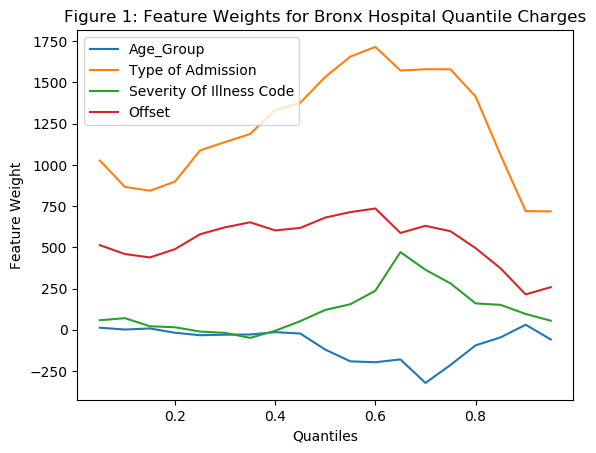

PyObject <matplotlib.legend.Legend object at 0x2737ac6d0>

In [705]:
plot(Q, A[:, 1], label = "Age_Group")
#plot(Q, A[:, 2], label = "Length of Stay")
plot(Q, A[:, 3], label = "Type of Admission")
plot(Q, A[:, 4], label = "Severity Of Illness Code")



plot(Q, A[:, 22], label = "Offset")



xlabel("Quantiles")
ylabel("Feature Weight")
title("Figure 1: Feature Weights for Bronx Hospital Quantile Charges")
legend()

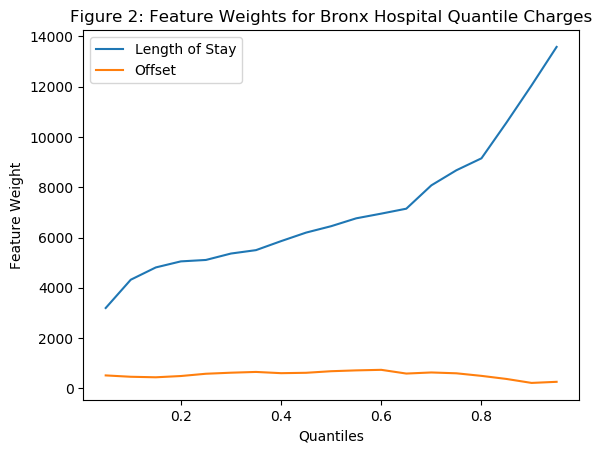

PyObject <matplotlib.legend.Legend object at 0x273949e50>

In [706]:
#plot(Q, A[:, 1], label = "Age_Group")
plot(Q, A[:, 2], label = "Length of Stay")
#plot(Q, A[:, 3], label = "Type of Admission")
#plot(Q, A[:, 4], label = "Severity_Of_Illness_Code")



plot(Q, A[:, 22], label = "Offset")



xlabel("Quantiles")
ylabel("Feature Weight")
title("Figure 2: Feature Weights for Bronx Hospital Quantile Charges")
legend()

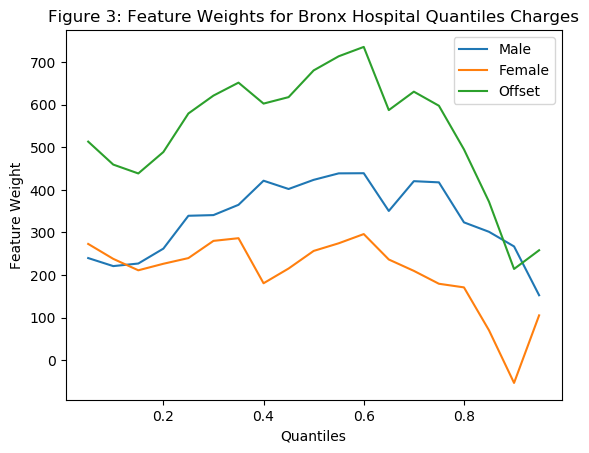

PyObject <matplotlib.legend.Legend object at 0x273af16d0>

In [707]:
plot(Q, A[:, 15], label = "Male")
plot(Q, A[:, 16], label = "Female")

plot(Q, A[:, 22], label = "Offset")



xlabel("Quantiles")
ylabel("Feature Weight")
title("Figure 3: Feature Weights for Bronx Hospital Quantiles Charges")
legend()

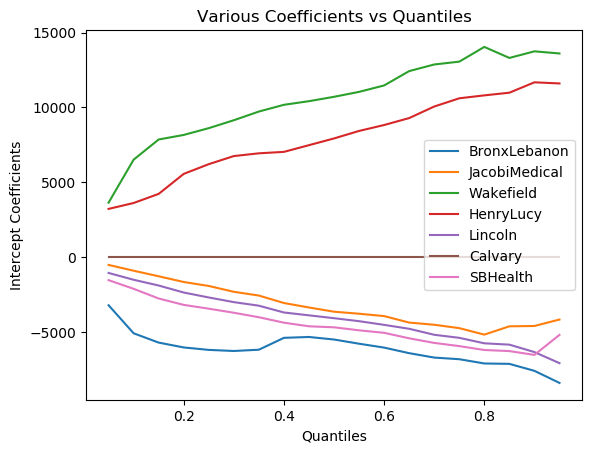

PyObject <matplotlib.legend.Legend object at 0x197a6a990>

In [321]:
plot(Q, A[:, 8], label = "BronxLebanon")
plot(Q, A[:, 9], label = "JacobiMedical")
plot(Q, A[:, 10], label = "Wakefield")
plot(Q, A[:, 11], label = "HenryLucy")
plot(Q, A[:, 12], label = "Lincoln")
plot(Q, A[:, 13], label = "Calvary")
plot(Q, A[:, 14], label = "SBHealth")




xlabel("Quantiles")
ylabel("Intercept Coefficients")
title("Various Coefficients vs Quantiles")
legend()

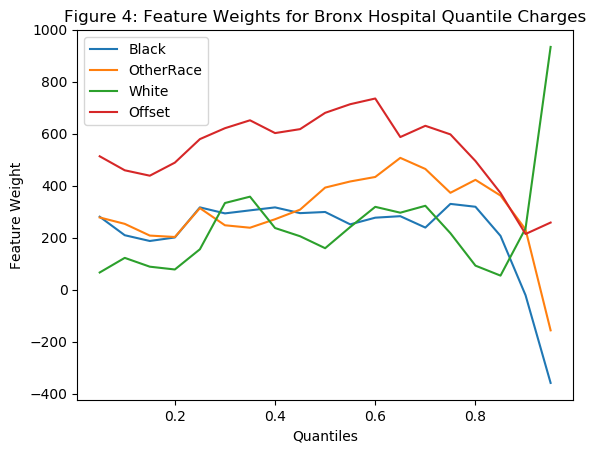

PyObject <matplotlib.legend.Legend object at 0x273e1cdd0>

In [708]:
plot(Q, A[:, 17], label = "Black")
plot(Q, A[:, 18], label = "OtherRace")
plot(Q, A[:, 19], label = "White")
plot(Q, A[:, 22], label = "Offset")







xlabel("Quantiles")
ylabel("Feature Weight")
title("Figure 4: Feature Weights for Bronx Hospital Quantile Charges")
legend()

In [311]:
A[1, :]

22-element Array{Float64,1}:
     8.44375
  2997.12   
  1087.29   
    92.8367 
    98.584  
   524.032  
   857.879  
 -3216.64   
  -521.083  
  3637.29   
  3222.0    
 -1058.11   
     0.0    
 -1539.41   
   227.785  
   296.247  
   310.637  
   377.501  
   -21.225  
     0.0    
     0.0    
   524.032  

In [312]:
#************************************* Old Versions of Training & Test *************************************#
xTrain = head(BronxData, 1823)
yTrain = xTrain[:, :Total_Charges]
xTrain = delete!(xTrain, :Total_Charges)

xTrain = convert(Array, xTrain)
yTrain = convert(Array, yTrain)


fullDataTrain = [copy(xTrain[:, :]) yTrain]
#typeof(fullDataTrain)
fullDataTrain = fullDataTrain[shuffle(1:end), :]
fullDataTrain



labelList = Symbol[]
for i=1:20
    push!(labelList, names(xTrain)[i])
end
labelList


xTrain = convert(Array, xTrain)
xTrain = [copy(xTrain[:, :]) ones(length(xTrain[:,1]))]
yTrain = convert(Array, yTrain)

xTest = tail(BronxData, 2279 - 1823)
yTest = xTest[:, :Total_Charges]
xTest = delete!(xTest, :Total_Charges)

xTest = convert(Array, xTest)
xTest = [copy(xTest[:, :]) ones(length(xTest[:,1]))]
yTest = convert(Array, yTest)

w = xTrain\yTrain

LoadError: [91mKeyError: key :Total_Charges not found[39m

In [313]:
5 ^ 2

25

In [48]:
sqrt(5^2)

5.0